In [30]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importing Library

In [31]:
# module imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import random
from sklearn.decomposition import PCA

# model imports
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import KernelPCA


# processing imports
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

import tensorflow as tf
from tensorflow.keras.utils import to_categorical

from keras.layers import Dense, LSTM, MaxPool1D, Flatten, Dropout # importing dense layer
from keras.models import Sequential #importing Sequential layer
from keras.layers import Input
from keras.models import Model
from tensorflow.keras.preprocessing.sequence import pad_sequences

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding
from keras.layers import LSTM
from keras.layers import Conv1D, MaxPooling1D
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import matthews_corrcoef, precision_score, recall_score

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, balanced_accuracy_score,classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.model_selection import train_test_split

import lightgbm as lgb
from tensorflow.keras.layers import Input, Dense, Reshape, Flatten, Dropout, multiply, Concatenate
from tensorflow.keras.layers import BatchNormalization, Activation, Embedding, ZeroPadding2D, LeakyReLU
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.initializers import RandomNormal
import tensorflow.keras.backend as K
from sklearn.utils import shuffle

np.random.seed(1635848)

In [32]:
# fetch the training file
file_path_full_training_set = '/content/drive/MyDrive/NSL-KDD/KDDTrain+.txt'
file_path_test = '/content/drive/MyDrive/NSL-KDD/KDDTest+.txt'

In [33]:
#df = pd.read_csv(file_path_20_percent)
df = pd.read_csv(file_path_full_training_set)
test_df = pd.read_csv(file_path_test)

# add the column labels
columns = (['duration'
,'protocol_type'
,'service'
,'flag'
,'src_bytes'
,'dst_bytes'
,'land'
,'wrong_fragment'
,'urgent'
,'hot'
,'num_failed_logins'
,'logged_in'
,'num_compromised'
,'root_shell'
,'su_attempted'
,'num_root'
,'num_file_creations'
,'num_shells'
,'num_access_files'
,'num_outbound_cmds'
,'is_host_login'
,'is_guest_login'
,'count'
,'srv_count'
,'serror_rate'
,'srv_serror_rate'
,'rerror_rate'
,'srv_rerror_rate'
,'same_srv_rate'
,'diff_srv_rate'
,'srv_diff_host_rate'
,'dst_host_count'
,'dst_host_srv_count'
,'dst_host_same_srv_rate'
,'dst_host_diff_srv_rate'
,'dst_host_same_src_port_rate'
,'dst_host_srv_diff_host_rate'
,'dst_host_serror_rate'
,'dst_host_srv_serror_rate'
,'dst_host_rerror_rate'
,'dst_host_srv_rerror_rate'
,'attack'
,'level'])

In [34]:
df.head()

,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.18,2,2.1,0.00,0.00.1,0.00.2,0.00.3,1.00,0.00.4,0.00.5,150,25,0.17,0.03,0.17.1,0.00.6,0.00.7,0.00.8,0.05,0.00.9,normal,20
0,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121,19,0.0,0.0,1.0,1.0,0.16,0.06,0.00,255,19,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [35]:
df.columns = columns
test_df.columns = columns

In [36]:
df.shape

(125972, 43)

In [37]:
test_df.shape

(22543, 43)

In [38]:
pd.set_option('display.max_columns', 43)
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121,19,0.0,0.0,1.0,1.0,0.16,0.06,0.00,255,19,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [39]:
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'attack', 'level'],
      dtype='object')

In [40]:
test_df.shape

(22543, 43)

In [41]:
df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level
count,125972.000000,1.259720e+05,1.259720e+05,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.0,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000
mean,287.146929,4.556710e+04,1.977927e+04,0.000198,0.022688,0.000111,0.204411,0.001222,0.395739,0.279253,0.001342,0.001103,0.302194,0.012669,0.000413,0.004096,0.0,0.000008,0.009423,84.108207,27.738093,0.284487,0.282488,0.119959,0.121184,0.660925,0.063053,0.097322,182.149200,115.653725,0.521244,0.082952,0.148379,0.032543,0.284455,0.278487,0.118832,0.120241,19.504056
std,2604.525522,5.870354e+06,4.021285e+06,0.014086,0.253531,0.014366,2.149977,0.045239,0.489011,23.942137,0.036603,0.045155,24.399715,0.483937,0.022181,0.099370,0.0,0.002817,0.096613,114.508828,72.636092,0.446457,0.447024,0.320437,0.323648,0.439624,0.180315,0.259831,99.206565,110.702886,0.448950,0.188922,0.308998,0.112564,0.444785,0.445670,0.306559,0.319460,2.291512
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.090000,0.000000,0.000000,82.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,14.000000,8.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.000000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,143.000000,18.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.060000,0.000000,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,21.000000
max,42908.000000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,1.000000,2.000000,7468.000000,43.000000,2.000000,9.000000,0.0,1.000000,1.000000,511.000000,511.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [42]:
print(df.columns)

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'attack', 'level'],
      dtype='object')


In [43]:
pd.set_option('display.max_rows', 23)
print('Label distribution Training set:')
print(df['attack'].value_counts())

Label distribution Training set:
attack
normal             67342
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: count, dtype: int64


In [44]:
print('Label distribution Test set:')
print(test_df['attack'].value_counts())

Label distribution Test set:
attack
normal          9711
neptune         4656
guess_passwd    1231
mscan            996
warezmaster      944
                ... 
perl               2
sqlattack          2
udpstorm           2
phf                2
imap               1
Name: count, Length: 38, dtype: int64


In [45]:
# colums that are categorical and not binary yet: protocol_type (column 2), service (column 3), flag (column 4).
# explore categorical features
print('Training set:')
for col_name in df.columns:
    if df[col_name].dtypes == 'object' :
        unique_cat = len(df[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} categories".format(col_name=col_name, unique_cat=unique_cat))

#see how distributed the feature service is, it is evenly distributed and therefore we need to make dummies for all.
print()
print('Distribution of categories in service:')
print(df['service'].value_counts().sort_values(ascending=False).head())

Training set:
Feature 'protocol_type' has 3 categories
Feature 'service' has 70 categories
Feature 'flag' has 11 categories
Feature 'attack' has 23 categories

Distribution of categories in service:
service
http        40338
private     21853
domain_u     9043
smtp         7313
ftp_data     6859
Name: count, dtype: int64


In [46]:
# Test set
print('Test set:')
for col_name in test_df.columns:
    if test_df[col_name].dtypes == 'object' :
        unique_cat = len(test_df[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} categories".format(col_name=col_name, unique_cat=unique_cat))

Test set:
Feature 'protocol_type' has 3 categories
Feature 'service' has 64 categories
Feature 'flag' has 11 categories
Feature 'attack' has 38 categories


In [47]:

from sklearn.preprocessing import LabelEncoder,OneHotEncoder
categorical_columns=['protocol_type', 'service', 'flag']
# insert code to get a list of categorical columns into a variable, categorical_columns
categorical_columns=['protocol_type', 'service', 'flag']
 # Get the categorical values into a 2D numpy array
df_categorical_values = df[categorical_columns]
testdf_categorical_values = test_df[categorical_columns]
df_categorical_values.head()

,protocol_type,service,flag
0,udp,other,SF
1,tcp,private,S0
2,tcp,http,SF
3,tcp,http,SF
4,tcp,private,REJ


In [48]:
# protocol type
unique_protocol=sorted(df.protocol_type.unique())
string1 = 'Protocol_type_'
unique_protocol2=[string1 + x for x in unique_protocol]
# service
unique_service=sorted(df.service.unique())
string2 = 'service_'
unique_service2=[string2 + x for x in unique_service]
# flag
unique_flag=sorted(df.flag.unique())
string3 = 'flag_'
unique_flag2=[string3 + x for x in unique_flag]
# put together
dumcols=unique_protocol2 + unique_service2 + unique_flag2
print(dumcols)

#do same for test set
unique_service_test=sorted(test_df.service.unique())
unique_service2_test=[string2 + x for x in unique_service_test]
testdumcols=unique_protocol2 + unique_service2_test + unique_flag2

['Protocol_type_icmp', 'Protocol_type_tcp', 'Protocol_type_udp', 'service_IRC', 'service_X11', 'service_Z39_50', 'service_aol', 'service_auth', 'service_bgp', 'service_courier', 'service_csnet_ns', 'service_ctf', 'service_daytime', 'service_discard', 'service_domain', 'service_domain_u', 'service_echo', 'service_eco_i', 'service_ecr_i', 'service_efs', 'service_exec', 'service_finger', 'service_ftp', 'service_ftp_data', 'service_gopher', 'service_harvest', 'service_hostnames', 'service_http', 'service_http_2784', 'service_http_443', 'service_http_8001', 'service_imap4', 'service_iso_tsap', 'service_klogin', 'service_kshell', 'service_ldap', 'service_link', 'service_login', 'service_mtp', 'service_name', 'service_netbios_dgm', 'service_netbios_ns', 'service_netbios_ssn', 'service_netstat', 'service_nnsp', 'service_nntp', 'service_ntp_u', 'service_other', 'service_pm_dump', 'service_pop_2', 'service_pop_3', 'service_printer', 'service_private', 'service_red_i', 'service_remote_job', 'serv

In [49]:
df_categorical_values_enc=df_categorical_values.apply(LabelEncoder().fit_transform)
print(df_categorical_values_enc.head())
# test set
testdf_categorical_values_enc=testdf_categorical_values.apply(LabelEncoder().fit_transform)

   protocol_type  service  flag
0              2       44     9
1              1       49     5
2              1       24     9
3              1       24     9
4              1       49     1


In [50]:
enc = OneHotEncoder()
df_categorical_values_encenc = enc.fit_transform(df_categorical_values_enc)
df_cat_data = pd.DataFrame(df_categorical_values_encenc.toarray(),columns=dumcols)
# test set
testdf_categorical_values_encenc = enc.fit_transform(testdf_categorical_values_enc)
testdf_cat_data = pd.DataFrame(testdf_categorical_values_encenc.toarray(),columns=testdumcols)

df_cat_data.head()

,Protocol_type_icmp,Protocol_type_tcp,Protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,service_csnet_ns,service_ctf,service_daytime,service_discard,service_domain,service_domain_u,service_echo,service_eco_i,service_ecr_i,service_efs,service_exec,...,service_telnet,service_tftp_u,service_tim_i,service_time,service_urh_i,service_urp_i,service_uucp,service_uucp_path,service_vmnet,service_whois,flag_OTH,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [51]:
trainservice=df['service'].tolist()
testservice= test_df['service'].tolist()
difference=list(set(trainservice) - set(testservice))
string = 'service_'
difference=[string + x for x in difference]
difference

['service_http_2784',
 'service_red_i',
 'service_aol',
 'service_urh_i',
 'service_http_8001',
 'service_harvest']

In [52]:
for col in difference:
    testdf_cat_data[col] = 0

testdf_cat_data.shape

(22543, 84)

In [53]:

newdf=df.join(df_cat_data)
newdf.drop('flag', axis=1, inplace=True)
newdf.drop('protocol_type', axis=1, inplace=True)
newdf.drop('service', axis=1, inplace=True)
# test data
newdf_test=test_df.join(testdf_cat_data)
newdf_test.drop('flag', axis=1, inplace=True)
newdf_test.drop('protocol_type', axis=1, inplace=True)
newdf_test.drop('service', axis=1, inplace=True)
print(newdf.shape)
print(newdf_test.shape)

(125972, 124)
(22543, 124)


In [54]:
newdf.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,...,service_telnet,service_tftp_u,service_tim_i,service_time,service_urh_i,service_urp_i,service_uucp,service_uucp_path,service_vmnet,service_whois,flag_OTH,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121,19,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [55]:
# take label column
labeldf=newdf['attack']
labeldf_test=newdf_test['attack']
# change the label column
newlabeldf=labeldf.replace({ 'normal' : 0, 'neptune' : 1 ,'back': 1, 'land': 1, 'pod': 1, 'smurf': 1, 'teardrop': 1,'mailbomb': 1, 'apache2': 1, 'processtable': 1, 'udpstorm': 1, 'worm': 1,
                           'ipsweep' : 2,'nmap' : 2,'portsweep' : 2,'satan' : 2,'mscan' : 2,'saint' : 2
                           ,'ftp_write': 3,'guess_passwd': 3,'imap': 3,'multihop': 3,'phf': 3,'spy': 3,'warezclient': 3,'warezmaster': 3,'sendmail': 3,'named': 3,'snmpgetattack': 3,'snmpguess': 3,'xlock': 3,'xsnoop': 3,'httptunnel': 3,
                           'buffer_overflow': 4,'loadmodule': 4,'perl': 4,'rootkit': 4,'ps': 4,'sqlattack': 4,'xterm': 4})
newlabeldf_test=labeldf_test.replace({ 'normal' : 0, 'neptune' : 1 ,'back': 1, 'land': 1, 'pod': 1, 'smurf': 1, 'teardrop': 1,'mailbomb': 1, 'apache2': 1, 'processtable': 1, 'udpstorm': 1, 'worm': 1,
                           'ipsweep' : 2,'nmap' : 2,'portsweep' : 2,'satan' : 2,'mscan' : 2,'saint' : 2
                           ,'ftp_write': 3,'guess_passwd': 3,'imap': 3,'multihop': 3,'phf': 3,'spy': 3,'warezclient': 3,'warezmaster': 3,'sendmail': 3,'named': 3,'snmpgetattack': 3,'snmpguess': 3,'xlock': 3,'xsnoop': 3,'httptunnel': 3,
                           'buffer_overflow': 4,'loadmodule': 4,'perl': 4,'rootkit': 4,'ps': 4,'sqlattack': 4,'xterm': 4})
# put the new label column back
newdf['attack'] = newlabeldf
newdf_test['attack'] = newlabeldf_test
print(newdf['attack'].head())

0    0
1    1
2    0
3    0
4    1
Name: attack, dtype: int64


/tmp/ipython-input-3327160078.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  newlabeldf=labeldf.replace({ 'normal' : 0, 'neptune' : 1 ,'back': 1, 'land': 1, 'pod': 1, 'smurf': 1, 'teardrop': 1,'mailbomb': 1, 'apache2': 1, 'processtable': 1, 'udpstorm': 1, 'worm': 1,
/tmp/ipython-input-3327160078.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  newlabeldf_test=labeldf_test.replace({ 'normal' : 0, 'neptune' : 1 ,'back': 1, 'land': 1, 'pod': 1, 'smurf': 1, 'teardrop': 1,'mailbomb': 1, 'apache2': 1, 'processtable': 1, 'udpstor

In [56]:
to_drop_DoS = [2,3,4]
to_drop_Probe = [1,3,4]
to_drop_R2L = [1,2,4]
to_drop_U2R = [1,2,3]
DoS_df=newdf[~newdf['attack'].isin(to_drop_DoS)];
Probe_df=newdf[~newdf['attack'].isin(to_drop_Probe)];
R2L_df=newdf[~newdf['attack'].isin(to_drop_R2L)];
U2R_df=newdf[~newdf['attack'].isin(to_drop_U2R)];

#test
DoS_df_test=newdf_test[~newdf_test['attack'].isin(to_drop_DoS)];
Probe_df_test=newdf_test[~newdf_test['attack'].isin(to_drop_Probe)];
R2L_df_test=newdf_test[~newdf_test['attack'].isin(to_drop_R2L)];
U2R_df_test=newdf_test[~newdf_test['attack'].isin(to_drop_U2R)];
print('Train:')
print('Dimensions of DoS:' ,DoS_df.shape)
print('Dimensions of Probe:' ,Probe_df.shape)
print('Dimensions of R2L:' ,R2L_df.shape)
print('Dimensions of U2R:' ,U2R_df.shape)
print('Test:')
print('Dimensions of DoS:' ,DoS_df_test.shape)
print('Dimensions of Probe:' ,Probe_df_test.shape)
print('Dimensions of R2L:' ,R2L_df_test.shape)
print('Dimensions of U2R:' ,U2R_df_test.shape)

Train:
Dimensions of DoS: (113269, 124)
Dimensions of Probe: (78998, 124)
Dimensions of R2L: (68337, 124)
Dimensions of U2R: (67394, 124)
Test:
Dimensions of DoS: (17170, 124)
Dimensions of Probe: (12132, 124)
Dimensions of R2L: (12596, 124)
Dimensions of U2R: (9778, 124)


In [57]:
# Split dataframes into X & Y
# assign X as a dataframe of features and Y as a series of outcome variables
X_DoS = DoS_df.drop('attack', axis=1)
Y_DoS = DoS_df['attack']

X_Probe = Probe_df.drop('attack', axis=1)
Y_Probe = Probe_df['attack']

X_R2L = R2L_df.drop('attack', axis=1)
Y_R2L = R2L_df['attack']

X_U2R = U2R_df.drop('attack', axis=1)
Y_U2R = U2R_df['attack']

# test set
X_DoS_test = DoS_df_test.drop('attack', axis=1)
Y_DoS_test = DoS_df_test['attack']

X_Probe_test = Probe_df_test.drop('attack', axis=1)
Y_Probe_test = Probe_df_test['attack']

X_R2L_test = R2L_df_test.drop('attack', axis=1)
Y_R2L_test = R2L_df_test['attack']

X_U2R_test = U2R_df_test.drop('attack', axis=1)
Y_U2R_test = U2R_df_test['attack']


In [58]:
X_DoS.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,...,service_telnet,service_tftp_u,service_tim_i,service_time,service_urh_i,service_urp_i,service_uucp,service_uucp_path,service_vmnet,service_whois,flag_OTH,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121,19,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [59]:
p = X_DoS.columns

In [60]:
Y_DoS.shape

(113269,)

In [61]:
colNames=list(X_DoS)
colNames_test=list(X_DoS_test)

In [62]:
len(colNames_test)

123

In [63]:
len(colNames)

123

In [64]:
from sklearn import preprocessing
scaler1 = preprocessing.StandardScaler().fit(X_DoS)
X_DoS=scaler1.transform(X_DoS)
scaler2 = preprocessing.StandardScaler().fit(X_Probe)
X_Probe=scaler2.transform(X_Probe)
scaler3 = preprocessing.StandardScaler().fit(X_R2L)
X_R2L=scaler3.transform(X_R2L)
scaler4 = preprocessing.StandardScaler().fit(X_U2R)
X_U2R=scaler4.transform(X_U2R)
# test data
scaler5 = preprocessing.StandardScaler().fit(X_DoS_test)
X_DoS_test=scaler5.transform(X_DoS_test)
scaler6 = preprocessing.StandardScaler().fit(X_Probe_test)
X_Probe_test=scaler6.transform(X_Probe_test)
scaler7 = preprocessing.StandardScaler().fit(X_R2L_test)
X_R2L_test=scaler7.transform(X_R2L_test)
scaler8 = preprocessing.StandardScaler().fit(X_U2R_test)
X_U2R_test=scaler8.transform(X_U2R_test)

In [65]:
print(X_DoS.std(axis=0))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1.
 1. 1. 1.]


In [66]:
X_Probe.std(axis=0);
X_R2L.std(axis=0);
X_U2R.std(axis=0);

In [67]:
from sklearn.feature_selection import SelectPercentile, f_classif
np.seterr(divide='ignore', invalid='ignore');
selector=SelectPercentile(f_classif, percentile=10)
X_newDoS = selector.fit_transform(X_DoS,Y_DoS)
X_newDoS.shape

/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [ 16  45  64  67  69  87 115] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)


(113269, 13)

In [68]:
true=selector.get_support()
newcolindex_DoS=[i for i, x in enumerate(true) if x]
newcolname_DoS=list( colNames[i] for i in newcolindex_DoS )
newcolname_DoS

['logged_in',
 'count',
 'serror_rate',
 'srv_serror_rate',
 'same_srv_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'service_http',
 'flag_S0',
 'flag_SF']

In [69]:
X_newProbe = selector.fit_transform(X_Probe,Y_Probe)
X_newProbe.shape

/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [ 4 16] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)


(78998, 13)

In [70]:
true=selector.get_support()
newcolindex_Probe=[i for i, x in enumerate(true) if x]
newcolname_Probe=list( colNames[i] for i in newcolindex_Probe )
newcolname_Probe

['logged_in',
 'rerror_rate',
 'srv_rerror_rate',
 'dst_host_srv_count',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate',
 'level',
 'Protocol_type_icmp',
 'service_eco_i',
 'service_private',
 'flag_SF']

In [71]:
X_newR2L = selector.fit_transform(X_R2L,Y_R2L)
X_newR2L.shape

/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [  4  16  44  45  47  48  49  50  51  52  55  58  59  63  64  65  67  68
  69  71  72  73  74  75  77  78  79  80  81  82  83  84  87  88  90  93
  94  97  99 100 101 108 109 110 111 115] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)


(68337, 13)

In [72]:
true=selector.get_support()
newcolindex_R2L=[i for i, x in enumerate(true) if x]
newcolname_R2L=list( colNames[i] for i in newcolindex_R2L)
newcolname_R2L

['dst_bytes',
 'hot',
 'num_failed_logins',
 'is_guest_login',
 'dst_host_srv_count',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'level',
 'service_ftp',
 'service_ftp_data',
 'service_http',
 'service_imap4',
 'flag_RSTO']

In [73]:
X_newU2R = selector.fit_transform(X_U2R,Y_U2R)
X_newU2R.shape

/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [  4  16  44  45  47  48  49  50  51  52  55  58  59  63  64  65  67  68
  69  71  72  73  74  75  76  77  78  79  80  81  82  83  84  87  88  90
  93  94  97  99 100 101 108 109 110 111 115] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)


(67394, 13)

In [74]:
true=selector.get_support()
newcolindex_U2R=[i for i, x in enumerate(true) if x]
newcolname_U2R=list( colNames[i] for i in newcolindex_U2R)
newcolname_U2R

['urgent',
 'hot',
 'root_shell',
 'num_file_creations',
 'num_shells',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'level',
 'service_ftp_data',
 'service_http',
 'service_telnet']

In [75]:
print('Features selected for DoS:',newcolname_DoS)
print()
print('Features selected for Probe:',newcolname_Probe)
print()
print('Features selected for R2L:',newcolname_R2L)
print()
print('Features selected for U2R:',newcolname_U2R)

Features selected for DoS: ['logged_in', 'count', 'serror_rate', 'srv_serror_rate', 'same_srv_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'service_http', 'flag_S0', 'flag_SF']

Features selected for Probe: ['logged_in', 'rerror_rate', 'srv_rerror_rate', 'dst_host_srv_count', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'level', 'Protocol_type_icmp', 'service_eco_i', 'service_private', 'flag_SF']

Features selected for R2L: ['dst_bytes', 'hot', 'num_failed_logins', 'is_guest_login', 'dst_host_srv_count', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'level', 'service_ftp', 'service_ftp_data', 'service_http', 'service_imap4', 'flag_RSTO']

Features selected for U2R: ['urgent', 'hot', 'root_shell', 'num_file_creations', 'num_shells', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rat

In [76]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
# Create a decision tree classifier. By convention, clf means 'classifier'
clf = DecisionTreeClassifier(random_state=0)

#rank all features, i.e continue the elimination until the last one
rfe = RFE(clf, n_features_to_select=1)
rfe.fit(X_newDoS, Y_DoS)
print ("DoS Features sorted by their rank:")
print (sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), newcolname_DoS)))

DoS Features sorted by their rank:
[(np.int64(1), 'same_srv_rate'), (np.int64(2), 'count'), (np.int64(3), 'flag_SF'), (np.int64(4), 'dst_host_serror_rate'), (np.int64(5), 'dst_host_same_srv_rate'), (np.int64(6), 'dst_host_srv_count'), (np.int64(7), 'dst_host_count'), (np.int64(8), 'logged_in'), (np.int64(9), 'serror_rate'), (np.int64(10), 'dst_host_srv_serror_rate'), (np.int64(11), 'srv_serror_rate'), (np.int64(12), 'service_http'), (np.int64(13), 'flag_S0')]


In [77]:
rfe.fit(X_newProbe, Y_Probe)
print ("Probe Features sorted by their rank:")
print (sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), newcolname_Probe)))

Probe Features sorted by their rank:
[(np.int64(1), 'level'), (np.int64(2), 'dst_host_diff_srv_rate'), (np.int64(3), 'service_private'), (np.int64(4), 'dst_host_srv_count'), (np.int64(5), 'logged_in'), (np.int64(6), 'dst_host_rerror_rate'), (np.int64(7), 'dst_host_same_src_port_rate'), (np.int64(8), 'service_eco_i'), (np.int64(9), 'flag_SF'), (np.int64(10), 'rerror_rate'), (np.int64(11), 'dst_host_srv_rerror_rate'), (np.int64(12), 'Protocol_type_icmp'), (np.int64(13), 'srv_rerror_rate')]


In [78]:
rfe.fit(X_newR2L, Y_R2L)

print ("R2L Features sorted by their rank:")
print (sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), newcolname_R2L)))

R2L Features sorted by their rank:
[(np.int64(1), 'level'), (np.int64(2), 'dst_host_srv_diff_host_rate'), (np.int64(3), 'dst_host_same_src_port_rate'), (np.int64(4), 'hot'), (np.int64(5), 'service_ftp_data'), (np.int64(6), 'dst_host_srv_count'), (np.int64(7), 'dst_bytes'), (np.int64(8), 'service_imap4'), (np.int64(9), 'num_failed_logins'), (np.int64(10), 'is_guest_login'), (np.int64(11), 'service_ftp'), (np.int64(12), 'service_http'), (np.int64(13), 'flag_RSTO')]


In [79]:
rfe.fit(X_newU2R, Y_U2R)

print ("U2R Features sorted by their rank:")
print (sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), newcolname_U2R)))

U2R Features sorted by their rank:
[(np.int64(1), 'level'), (np.int64(2), 'dst_host_srv_count'), (np.int64(3), 'hot'), (np.int64(4), 'num_file_creations'), (np.int64(5), 'dst_host_count'), (np.int64(6), 'service_ftp_data'), (np.int64(7), 'dst_host_srv_diff_host_rate'), (np.int64(8), 'dst_host_same_src_port_rate'), (np.int64(9), 'service_telnet'), (np.int64(10), 'service_http'), (np.int64(11), 'num_shells'), (np.int64(12), 'root_shell'), (np.int64(13), 'urgent')]


In [80]:
from sklearn.feature_selection import RFE
clf = DecisionTreeClassifier(random_state=0)
rfe = RFE(estimator=clf, n_features_to_select=13, step=1)
rfe.fit(X_DoS, Y_DoS)
X_rfeDoS=rfe.transform(X_DoS)
true=rfe.support_
rfecolindex_DoS=[i for i, x in enumerate(true) if x]
rfecolname_DoS=list(colNames[i] for i in rfecolindex_DoS)

In [81]:
rfe.fit(X_newProbe, Y_Probe)
print ("Probe Features sorted by their rank:")
print (sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), newcolname_Probe)))

Probe Features sorted by their rank:
[(np.int64(1), 'Protocol_type_icmp'), (np.int64(1), 'dst_host_diff_srv_rate'), (np.int64(1), 'dst_host_rerror_rate'), (np.int64(1), 'dst_host_same_src_port_rate'), (np.int64(1), 'dst_host_srv_count'), (np.int64(1), 'dst_host_srv_rerror_rate'), (np.int64(1), 'flag_SF'), (np.int64(1), 'level'), (np.int64(1), 'logged_in'), (np.int64(1), 'rerror_rate'), (np.int64(1), 'service_eco_i'), (np.int64(1), 'service_private'), (np.int64(1), 'srv_rerror_rate')]


In [82]:
rfe.fit(X_newR2L, Y_R2L)

print ("R2L Features sorted by their rank:")
print (sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), newcolname_R2L)))

R2L Features sorted by their rank:
[(np.int64(1), 'dst_bytes'), (np.int64(1), 'dst_host_same_src_port_rate'), (np.int64(1), 'dst_host_srv_count'), (np.int64(1), 'dst_host_srv_diff_host_rate'), (np.int64(1), 'flag_RSTO'), (np.int64(1), 'hot'), (np.int64(1), 'is_guest_login'), (np.int64(1), 'level'), (np.int64(1), 'num_failed_logins'), (np.int64(1), 'service_ftp'), (np.int64(1), 'service_ftp_data'), (np.int64(1), 'service_http'), (np.int64(1), 'service_imap4')]


In [83]:
rfe.fit(X_newU2R, Y_U2R)

print ("U2R Features sorted by their rank:")
print (sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), newcolname_U2R)))

U2R Features sorted by their rank:
[(np.int64(1), 'dst_host_count'), (np.int64(1), 'dst_host_same_src_port_rate'), (np.int64(1), 'dst_host_srv_count'), (np.int64(1), 'dst_host_srv_diff_host_rate'), (np.int64(1), 'hot'), (np.int64(1), 'level'), (np.int64(1), 'num_file_creations'), (np.int64(1), 'num_shells'), (np.int64(1), 'root_shell'), (np.int64(1), 'service_ftp_data'), (np.int64(1), 'service_http'), (np.int64(1), 'service_telnet'), (np.int64(1), 'urgent')]


In [84]:
from sklearn.feature_selection import RFE
clf = DecisionTreeClassifier(random_state=0)
rfe = RFE(estimator=clf, n_features_to_select=13, step=1)
rfe.fit(X_DoS, Y_DoS)
X_rfeDoS=rfe.transform(X_DoS)
true=rfe.support_
rfecolindex_DoS=[i for i, x in enumerate(true) if x]
rfecolname_DoS=list(colNames[i] for i in rfecolindex_DoS)

In [85]:
rfe.fit(X_Probe, Y_Probe)
X_rfeProbe=rfe.transform(X_Probe)
true=rfe.support_
rfecolindex_Probe=[i for i, x in enumerate(true) if x]
rfecolname_Probe=list(colNames[i] for i in rfecolindex_Probe)

In [86]:
rfe.fit(X_R2L, Y_R2L)
X_rfeR2L=rfe.transform(X_R2L)
true=rfe.support_
rfecolindex_R2L=[i for i, x in enumerate(true) if x]
rfecolname_R2L=list(colNames[i] for i in rfecolindex_R2L)

In [87]:
rfe.fit(X_U2R, Y_U2R)
X_rfeU2R=rfe.transform(X_U2R)
true=rfe.support_
rfecolindex_U2R=[i for i, x in enumerate(true) if x]
rfecolname_U2R=list(colNames[i] for i in rfecolindex_U2R)

In [88]:
print('Features selected for DoS:',rfecolname_DoS)
print()
print('Features selected for Probe:',rfecolname_Probe)
print()
print('Features selected for R2L:',rfecolname_R2L)
print()
print('Features selected for U2R:',rfecolname_U2R)

Features selected for DoS: ['src_bytes', 'dst_bytes', 'wrong_fragment', 'count', 'serror_rate', 'same_srv_rate', 'dst_host_same_srv_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'level', 'service_X11', 'service_ecr_i', 'service_ftp_data']

Features selected for Probe: ['src_bytes', 'dst_bytes', 'rerror_rate', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_rerror_rate', 'level', 'service_finger', 'service_ftp_data', 'service_http', 'service_private', 'service_smtp']

Features selected for R2L: ['duration', 'src_bytes', 'dst_bytes', 'hot', 'logged_in', 'num_root', 'serror_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_srv_diff_host_rate', 'dst_host_srv_serror_rate', 'level', 'service_ftp_data']

Features selected for U2R: ['dst_bytes', 'srv_count', 'dst_host_count', 'dst_host_srv_diff_host_rate', 'level', 'service_ftp_data', 'service_other', 'flag_S0', 'flag_S1', 'flag_S2', 'flag_S3', 'flag_SF', 'flag_SH']


In [89]:
print(X_rfeDoS.shape)
print(X_rfeProbe.shape)
print(X_rfeR2L.shape)
print(X_rfeU2R.shape)

(113269, 13)
(78998, 13)
(68337, 13)
(67394, 13)


In [90]:
Y_DoS.shape

(113269,)

In [91]:
# all features
clf_DoS=DecisionTreeClassifier(random_state=0)
clf_Probe=DecisionTreeClassifier(random_state=0)
clf_R2L=DecisionTreeClassifier(random_state=0)
clf_U2R=DecisionTreeClassifier(random_state=0)
clf_DoS.fit(X_DoS, Y_DoS)
clf_Probe.fit(X_Probe, Y_Probe)
clf_R2L.fit(X_R2L, Y_R2L)
clf_U2R.fit(X_U2R, Y_U2R)

DecisionTreeClassifier(random_state=0)

In [92]:
# selected features
clf_rfeDoS=DecisionTreeClassifier(random_state=0)
clf_rfeProbe=DecisionTreeClassifier(random_state=0)
clf_rfeR2L=DecisionTreeClassifier(random_state=0)
clf_rfeU2R=DecisionTreeClassifier(random_state=0)
clf_rfeDoS.fit(X_rfeDoS, Y_DoS)
clf_rfeProbe.fit(X_rfeProbe, Y_Probe)
clf_rfeR2L.fit(X_rfeR2L, Y_R2L)
clf_rfeU2R.fit(X_rfeU2R, Y_U2R)

DecisionTreeClassifier(random_state=0)

In [93]:
!pip install lazypredict

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.4/26.4 MB 88.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 80.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 66.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.4/247.4 kB 23.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 703.4/703.4 kB 52.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.4/203.4 kB 17.9 MB/s eta 0:00:00


In [94]:
Y_DoS_pred=clf_DoS.predict(X_DoS_test)
# Create confusion matrix
pd.crosstab(Y_DoS_test, Y_DoS_pred, rownames=['Actual attacks'], colnames=['Predicted attacks'])

Predicted attacks,0,1
Actual attacks,,
0,9454,257
1,1667,5792


In [95]:
Y_Probe_pred=clf_Probe.predict(X_Probe_test)
# Create confusion matrix
pd.crosstab(Y_Probe_test, Y_Probe_pred, rownames=['Actual attacks'], colnames=['Predicted attacks'])

Predicted attacks,0,2
Actual attacks,,
0,2861,6850
2,164,2257


In [96]:
Y_R2L_pred=clf_R2L.predict(X_R2L_test)
# Create confusion matrix
pd.crosstab(Y_R2L_test, Y_R2L_pred, rownames=['Actual attacks'], colnames=['Predicted attacks'])

Predicted attacks,0,3
Actual attacks,,
0,9692,19
3,2875,10


In [97]:
Y_U2R_pred=clf_U2R.predict(X_U2R_test)
# Create confusion matrix
pd.crosstab(Y_U2R_test, Y_U2R_pred, rownames=['Actual attacks'], colnames=['Predicted attacks'])

Predicted attacks,0,4
Actual attacks,,
0,9711,0
4,59,8


In [98]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
accuracy = cross_val_score(clf_DoS, X_DoS_test, Y_DoS_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))
precision = cross_val_score(clf_DoS, X_DoS_test, Y_DoS_test, cv=10, scoring='precision')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))
recall = cross_val_score(clf_DoS, X_DoS_test, Y_DoS_test, cv=10, scoring='recall')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))
f = cross_val_score(clf_DoS, X_DoS_test, Y_DoS_test, cv=10, scoring='f1')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))

Accuracy: 0.99738 (+/- 0.00251)
Precision: 0.99626 (+/- 0.00392)
Recall: 0.99772 (+/- 0.00433)
F-measure: 0.99699 (+/- 0.00289)


In [99]:
accuracy = cross_val_score(clf_Probe, X_Probe_test, Y_Probe_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))
precision = cross_val_score(clf_Probe, X_Probe_test, Y_Probe_test, cv=10, scoring='precision_macro')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))
recall = cross_val_score(clf_Probe, X_Probe_test, Y_Probe_test, cv=10, scoring='recall_macro')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))
f = cross_val_score(clf_Probe, X_Probe_test, Y_Probe_test, cv=10, scoring='f1_macro')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))

Accuracy: 0.99769 (+/- 0.00178)
Precision: 0.99655 (+/- 0.00410)
Recall: 0.99623 (+/- 0.00222)
F-measure: 0.99639 (+/- 0.00277)


In [100]:
accuracy = cross_val_score(clf_R2L, X_R2L_test, Y_R2L_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))
precision = cross_val_score(clf_R2L, X_R2L_test, Y_R2L_test, cv=10, scoring='precision_macro')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))
recall = cross_val_score(clf_R2L, X_R2L_test, Y_R2L_test, cv=10, scoring='recall_macro')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))
f = cross_val_score(clf_R2L, X_R2L_test, Y_R2L_test, cv=10, scoring='f1_macro')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))


Accuracy: 0.99714 (+/- 0.00286)
Precision: 0.99537 (+/- 0.00413)
Recall: 0.99656 (+/- 0.00488)
F-measure: 0.99596 (+/- 0.00404)


In [101]:
accuracy = cross_val_score(clf_U2R, X_U2R_test, Y_U2R_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))
precision = cross_val_score(clf_U2R, X_U2R_test, Y_U2R_test, cv=10, scoring='precision_macro')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))
recall = cross_val_score(clf_U2R, X_U2R_test, Y_U2R_test, cv=10, scoring='recall_macro')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))
f = cross_val_score(clf_U2R, X_U2R_test, Y_U2R_test, cv=10, scoring='f1_macro')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))

Accuracy: 0.99847 (+/- 0.00333)
Precision: 0.93886 (+/- 0.11895)
Recall: 0.95549 (+/- 0.14716)
F-measure: 0.94502 (+/- 0.12321)


In [102]:
%matplotlib inline

Automatically created module for IPython interactive environment


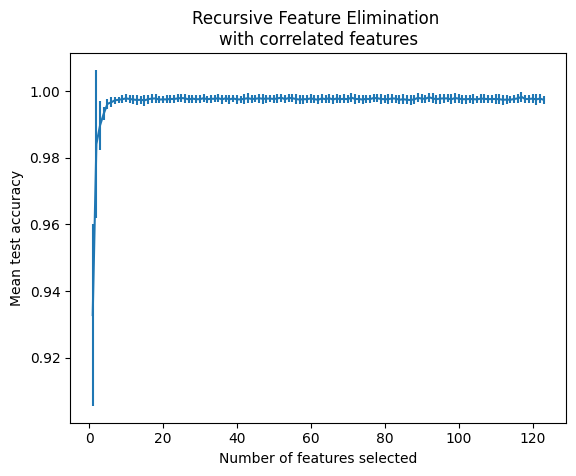

In [103]:
print(__doc__)

import matplotlib.pyplot as plt
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

# Create the RFE object and compute a cross-validated score.
# The "accuracy" scoring is proportional to the number of correct
# classifications
rfecv_DoS = RFECV(estimator=clf_DoS, step=1, cv=10, scoring='accuracy')
rfecv_DoS.fit(X_DoS_test, Y_DoS_test)

n_scores = len(rfecv_DoS.cv_results_["mean_test_score"])
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Mean test accuracy")
plt.errorbar(
    range(1, n_scores + 1),
    rfecv_DoS.cv_results_["mean_test_score"],
    yerr=rfecv_DoS.cv_results_["std_test_score"],
)
plt.title("Recursive Feature Elimination \nwith correlated features")
plt.show()

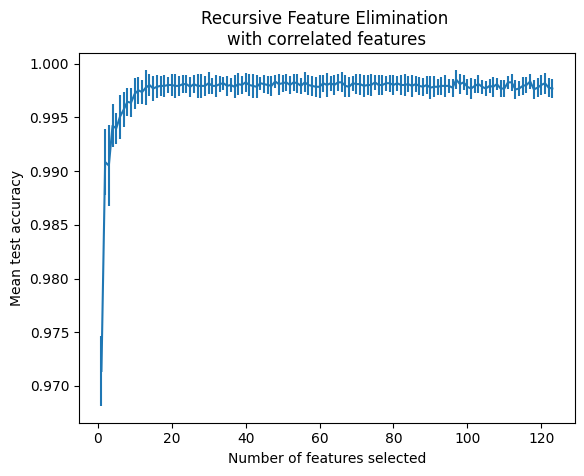

In [104]:
rfecv_Probe = RFECV(estimator=clf_Probe, step=1, cv=10, scoring='accuracy')
rfecv_Probe.fit(X_Probe_test, Y_Probe_test)
# Plot number of features VS. cross-validation scores
n_scores = len(rfecv_Probe.cv_results_["mean_test_score"])
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Mean test accuracy")
plt.errorbar(
    range(1, n_scores + 1),
    rfecv_Probe.cv_results_["mean_test_score"],
    yerr=rfecv_Probe.cv_results_["std_test_score"],
)
plt.title("Recursive Feature Elimination \nwith correlated features")
plt.show()

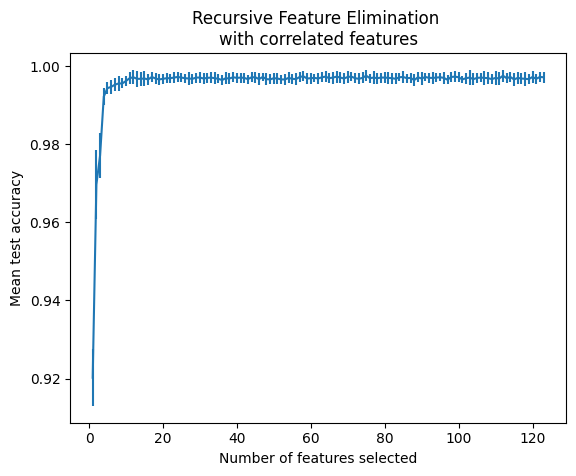

In [105]:
rfecv_R2L = RFECV(estimator=clf_R2L, step=1, cv=10, scoring='accuracy')
rfecv_R2L.fit(X_R2L_test, Y_R2L_test)
# Plot number of features VS. cross-validation scores
n_scores = len(rfecv_R2L.cv_results_["mean_test_score"])
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Mean test accuracy")
plt.errorbar(
    range(1, n_scores + 1),
    rfecv_R2L.cv_results_["mean_test_score"],
    yerr=rfecv_R2L.cv_results_["std_test_score"],
)
plt.title("Recursive Feature Elimination \nwith correlated features")
plt.show()

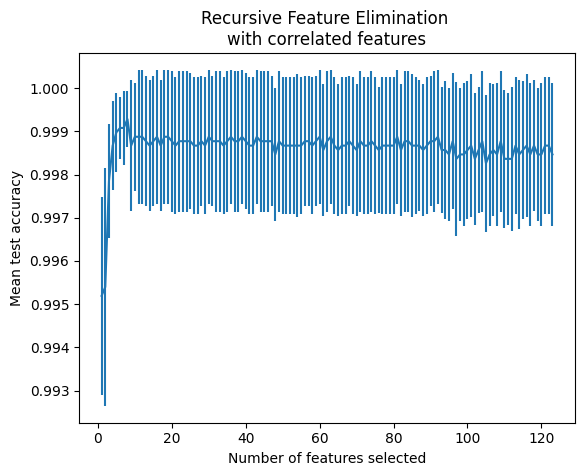

In [106]:
rfecv_U2R = RFECV(estimator=clf_U2R, step=1, cv=10, scoring='accuracy')
rfecv_U2R.fit(X_U2R_test, Y_U2R_test)
n_scores = len(rfecv_U2R.cv_results_["mean_test_score"])
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Mean test accuracy")
plt.errorbar(
    range(1, n_scores + 1),
    rfecv_U2R.cv_results_["mean_test_score"],
    yerr=rfecv_U2R.cv_results_["std_test_score"],
)
plt.title("Recursive Feature Elimination \nwith correlated features")
plt.show()

In [107]:
# reduce test dataset to 13 features, use only features described in rfecolname_DoS etc.
X_DoS_test2=X_DoS_test[:,rfecolindex_DoS]
X_Probe_test2=X_Probe_test[:,rfecolindex_Probe]
X_R2L_test2=X_R2L_test[:,rfecolindex_R2L]
X_U2R_test2=X_U2R_test[:,rfecolindex_U2R]
X_U2R_test2.shape

(9778, 13)

In [108]:
Y_DoS_pred2=clf_rfeDoS.predict(X_DoS_test2)
# Create confusion matrix
pd.crosstab(Y_DoS_test, Y_DoS_pred2, rownames=['Actual attacks'], colnames=['Predicted attacks'])

Predicted attacks,0,1
Actual attacks,,
0,9363,348
1,1496,5963


In [109]:
Y_Probe_pred2=clf_rfeProbe.predict(X_Probe_test2)
# Create confusion matrix
pd.crosstab(Y_Probe_test, Y_Probe_pred2, rownames=['Actual attacks'], colnames=['Predicted attacks'])

Predicted attacks,0,2
Actual attacks,,
0,8644,1067
2,818,1603


In [110]:
Y_R2L_pred2=clf_rfeR2L.predict(X_R2L_test2)
# Create confusion matrix
pd.crosstab(Y_R2L_test, Y_R2L_pred2, rownames=['Actual attacks'], colnames=['Predicted attacks'])

Predicted attacks,0,3
Actual attacks,,
0,9707,4
3,2875,10


In [111]:
Y_U2R_pred2=clf_rfeU2R.predict(X_U2R_test2)
# Create confusion matrix
pd.crosstab(Y_U2R_test, Y_U2R_pred2, rownames=['Actual attacks'], colnames=['Predicted attacks'])

Predicted attacks,0,4
Actual attacks,,
0,9711,0
4,59,8


In [112]:
accuracy = cross_val_score(clf_rfeDoS, X_DoS_test2, Y_DoS_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))
precision = cross_val_score(clf_rfeDoS, X_DoS_test2, Y_DoS_test, cv=10, scoring='precision')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))
recall = cross_val_score(clf_rfeDoS, X_DoS_test2, Y_DoS_test, cv=10, scoring='recall')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))
f = cross_val_score(clf_rfeDoS, X_DoS_test2, Y_DoS_test, cv=10, scoring='f1')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))

Accuracy: 0.99808 (+/- 0.00173)
Precision: 0.99719 (+/- 0.00252)
Recall: 0.99839 (+/- 0.00201)
F-measure: 0.99779 (+/- 0.00199)


In [113]:
accuracy = cross_val_score(clf_rfeProbe, X_Probe_test2, Y_Probe_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))
precision = cross_val_score(clf_rfeProbe, X_Probe_test2, Y_Probe_test, cv=10, scoring='precision_macro')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))
recall = cross_val_score(clf_rfeProbe, X_Probe_test2, Y_Probe_test, cv=10, scoring='recall_macro')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))
f = cross_val_score(clf_rfeProbe, X_Probe_test2, Y_Probe_test, cv=10, scoring='f1_macro')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))

Accuracy: 0.99580 (+/- 0.00290)
Precision: 0.99308 (+/- 0.00652)
Recall: 0.99381 (+/- 0.00500)
F-measure: 0.99343 (+/- 0.00453)


In [114]:
accuracy = cross_val_score(clf_rfeR2L, X_R2L_test2, Y_R2L_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))
precision = cross_val_score(clf_rfeR2L, X_R2L_test2, Y_R2L_test, cv=10, scoring='precision_macro')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))
recall = cross_val_score(clf_rfeR2L, X_R2L_test2, Y_R2L_test, cv=10, scoring='recall_macro')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))
f = cross_val_score(clf_rfeR2L, X_R2L_test2, Y_R2L_test, cv=10, scoring='f1_macro')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))

Accuracy: 0.99301 (+/- 0.00375)
Precision: 0.99001 (+/- 0.00583)
Recall: 0.99023 (+/- 0.00657)
F-measure: 0.99011 (+/- 0.00530)


In [115]:
accuracy = cross_val_score(clf_rfeU2R, X_U2R_test2, Y_U2R_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))
precision = cross_val_score(clf_rfeU2R, X_U2R_test2, Y_U2R_test, cv=10, scoring='precision_macro')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))
recall = cross_val_score(clf_rfeU2R, X_U2R_test2, Y_U2R_test, cv=10, scoring='recall_macro')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))
f = cross_val_score(clf_rfeU2R, X_U2R_test2, Y_U2R_test, cv=10, scoring='f1_macro')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))

Accuracy: 0.99816 (+/- 0.00220)
Precision: 0.93497 (+/- 0.09060)
Recall: 0.93168 (+/- 0.10875)
F-measure: 0.93165 (+/- 0.08622)


In [116]:
from sklearn.model_selection import StratifiedKFold
accuracy = cross_val_score(clf_rfeDoS, X_DoS_test2, Y_DoS_test, cv=StratifiedKFold(10), scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))

Accuracy: 0.99808 (+/- 0.00173)


In [117]:
accuracy = cross_val_score(clf_rfeProbe, X_Probe_test2, Y_Probe_test, cv=StratifiedKFold(10), scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))


Accuracy: 0.99580 (+/- 0.00290)


In [118]:
accuracy = cross_val_score(clf_rfeR2L, X_R2L_test2, Y_R2L_test, cv=StratifiedKFold(10), scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))

Accuracy: 0.99301 (+/- 0.00375)


In [119]:
accuracy = cross_val_score(clf_rfeU2R, X_U2R_test2, Y_U2R_test, cv=StratifiedKFold(10), scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))

Accuracy: 0.99816 (+/- 0.00220)


CV DOS

In [120]:
accuracy = cross_val_score(clf_rfeDoS, X_DoS_test2, Y_DoS_test, cv=2, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))

Accuracy: 0.99645 (+/- 0.00035)


In [121]:
accuracy = cross_val_score(clf_rfeDoS, X_DoS_test2, Y_DoS_test, cv=5, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))

Accuracy: 0.99761 (+/- 0.00119)


In [122]:
accuracy = cross_val_score(clf_rfeDoS, X_DoS_test2, Y_DoS_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))

Accuracy: 0.99808 (+/- 0.00173)


In [123]:
accuracy = cross_val_score(clf_rfeDoS, X_DoS_test2, Y_DoS_test, cv=30, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))

Accuracy: 0.99790 (+/- 0.00318)


In [124]:
accuracy = cross_val_score(clf_rfeDoS, X_DoS_test2, Y_DoS_test, cv=50, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))

Accuracy: 0.99773 (+/- 0.00574)


CV Probe

In [125]:
accuracy = cross_val_score(clf_rfeProbe, X_Probe_test2, Y_Probe_test, cv=2, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))

Accuracy: 0.99431 (+/- 0.00445)


In [126]:
accuracy = cross_val_score(clf_rfeProbe, X_Probe_test2, Y_Probe_test, cv=5, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))

Accuracy: 0.99604 (+/- 0.00298)


In [127]:
accuracy = cross_val_score(clf_rfeProbe, X_Probe_test2, Y_Probe_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))

Accuracy: 0.99580 (+/- 0.00290)


In [128]:
accuracy = cross_val_score(clf_rfeProbe, X_Probe_test2, Y_Probe_test, cv=30, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))

Accuracy: 0.99637 (+/- 0.00473)


In [129]:
accuracy = cross_val_score(clf_rfeProbe, X_Probe_test2, Y_Probe_test, cv=50, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))

Accuracy: 0.99637 (+/- 0.00731)


# CV R2L

In [130]:
accuracy = cross_val_score(clf_rfeR2L, X_R2L_test2, Y_R2L_test, cv=2, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))

Accuracy: 0.99095 (+/- 0.00191)


In [131]:
accuracy = cross_val_score(clf_rfeR2L, X_R2L_test2, Y_R2L_test, cv=5, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))

Accuracy: 0.99270 (+/- 0.00217)


In [132]:
accuracy = cross_val_score(clf_rfeR2L, X_R2L_test2, Y_R2L_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))

Accuracy: 0.99301 (+/- 0.00375)


In [133]:
accuracy = cross_val_score(clf_rfeR2L, X_R2L_test2, Y_R2L_test, cv=30, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))

Accuracy: 0.99325 (+/- 0.00977)


In [134]:
accuracy = cross_val_score(clf_rfeR2L, X_R2L_test2, Y_R2L_test, cv=50, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))

Accuracy: 0.99365 (+/- 0.00940)


CV U2R

In [135]:
accuracy = cross_val_score(clf_rfeU2R, X_U2R_test2, Y_U2R_test, cv=2, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))

Accuracy: 0.99744 (+/- 0.00061)


In [136]:
accuracy = cross_val_score(clf_rfeU2R, X_U2R_test2, Y_U2R_test, cv=5, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))

Accuracy: 0.99826 (+/- 0.00104)


In [137]:
accuracy = cross_val_score(clf_rfeU2R, X_U2R_test2, Y_U2R_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))

Accuracy: 0.99816 (+/- 0.00220)


In [138]:
accuracy = cross_val_score(clf_rfeU2R, X_U2R_test2, Y_U2R_test, cv=30, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))

Accuracy: 0.99826 (+/- 0.00378)


In [139]:
accuracy = cross_val_score(clf_rfeU2R, X_U2R_test2, Y_U2R_test, cv=50, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))

Accuracy: 0.99836 (+/- 0.00519)


ANN without ref

In [140]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout
from tensorflow.python.keras import regularizers

In [141]:
from keras.callbacks import ModelCheckpoint
my_callbacks = [
    ModelCheckpoint(filepath='/content/drive/MyDrive/check/ANN1_intrusion.h5', verbose=1, save_best_only=True, monitor='val_accuracy', mode='max')
]

In [142]:
import tensorflow as tf

In [145]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.regularizers import l2  # <- correct import

# Build ANN
ann = Sequential()
ann.add(Input(shape=(123,)))

ann.add(Dense(units=256, activation='relu', kernel_regularizer=l2(0.0001)))
ann.add(Dropout(0.3))
ann.add(BatchNormalization())

ann.add(Dense(units=128, activation='relu', kernel_regularizer=l2(0.0001)))
ann.add(Dropout(0.3))
ann.add(BatchNormalization())

ann.add(Dense(units=64, activation='relu', kernel_regularizer=l2(0.0001)))
ann.add(Dropout(0.3))
ann.add(BatchNormalization())

ann.add(Dense(units=32, activation='relu', kernel_regularizer=l2(0.0001)))
ann.add(Dropout(0.3))
ann.add(BatchNormalization())

ann.add(Dense(units=1, activation='sigmoid'))

# Compile
ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [146]:
ann.compile(optimizer= 'adam',loss='binary_crossentropy',metrics=['accuracy'])

In [147]:
from tensorflow.keras.callbacks import EarlyStopping
model=ann.fit(X_DoS, Y_DoS,batch_size = 250, validation_data=(X_DoS_test, Y_DoS_test),epochs =50,callbacks = [my_callbacks])

Epoch 1/50
454/454 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9447 - loss: 0.1949
Epoch 1: val_accuracy improved from -inf to 0.92184, saving model to /content/drive/MyDrive/check/ANN1_intrusion.h5


454/454 ━━━━━━━━━━━━━━━━━━━━ 19s 18ms/step - accuracy: 0.9447 - loss: 0.1947 - val_accuracy: 0.9218 - val_loss: 0.3879
Epoch 2/50
454/454 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9976 - loss: 0.0454
Epoch 2: val_accuracy improved from 0.92184 to 0.92609, saving model to /content/drive/MyDrive/check/ANN1_intrusion.h5


454/454 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9976 - loss: 0.0454 - val_accuracy: 0.9261 - val_loss: 0.4444
Epoch 3/50
447/454 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9982 - loss: 0.0360
Epoch 3: val_accuracy improved from 0.92609 to 0.92988, saving model to /content/drive/MyDrive/check/ANN1_intrusion.h5


454/454 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9982 - loss: 0.0360 - val_accuracy: 0.9299 - val_loss: 0.4232
Epoch 4/50
443/454 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9987 - loss: 0.0281
Epoch 4: val_accuracy did not improve from 0.92988
454/454 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9987 - loss: 0.0280 - val_accuracy: 0.9258 - val_loss: 0.4755
Epoch 5/50
437/454 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9989 - loss: 0.0228
Epoch 5: val_accuracy improved from 0.92988 to 0.93541, saving model to /content/drive/MyDrive/check/ANN1_intrusion.h5


454/454 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9989 - loss: 0.0228 - val_accuracy: 0.9354 - val_loss: 0.3810
Epoch 6/50
446/454 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9988 - loss: 0.0184
Epoch 6: val_accuracy improved from 0.93541 to 0.93757, saving model to /content/drive/MyDrive/check/ANN1_intrusion.h5


454/454 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9988 - loss: 0.0184 - val_accuracy: 0.9376 - val_loss: 0.3605
Epoch 7/50
443/454 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9988 - loss: 0.0163
Epoch 7: val_accuracy improved from 0.93757 to 0.95090, saving model to /content/drive/MyDrive/check/ANN1_intrusion.h5


454/454 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9988 - loss: 0.0163 - val_accuracy: 0.9509 - val_loss: 0.2963
Epoch 8/50
451/454 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9990 - loss: 0.0141
Epoch 8: val_accuracy did not improve from 0.95090
454/454 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9990 - loss: 0.0141 - val_accuracy: 0.9300 - val_loss: 0.3993
Epoch 9/50
452/454 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9988 - loss: 0.0132
Epoch 9: val_accuracy did not improve from 0.95090
454/454 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9988 - loss: 0.0132 - val_accuracy: 0.9453 - val_loss: 0.3144
Epoch 10/50
448/454 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9989 - loss: 0.0107
Epoch 10: val_accuracy did not improve from 0.95090
454/454 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9989 - loss: 0.0107 - val_accuracy: 0.9478 - val_loss: 0.3034
Epoch 11/50
439/454 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9989 - loss: 0.0108
Epoch 11: val_accuracy improved 

454/454 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9989 - loss: 0.0107 - val_accuracy: 0.9591 - val_loss: 0.2822
Epoch 12/50
452/454 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9989 - loss: 0.0107
Epoch 12: val_accuracy did not improve from 0.95911
454/454 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9989 - loss: 0.0107 - val_accuracy: 0.9436 - val_loss: 0.3207
Epoch 13/50
448/454 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9988 - loss: 0.0102
Epoch 13: val_accuracy did not improve from 0.95911
454/454 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9988 - loss: 0.0102 - val_accuracy: 0.9411 - val_loss: 0.3891
Epoch 14/50
449/454 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9988 - loss: 0.0093
Epoch 14: val_accuracy did not improve from 0.95911
454/454 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9988 - loss: 0.0093 - val_accuracy: 0.9340 - val_loss: 0.4186
Epoch 15/50
446/454 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9990 - loss: 0.0081
Epoch 15: val_accuracy did n

In [148]:
y_pred = ann.predict(X_DoS_test)

537/537 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


In [150]:
y_pred

array([[9.9978495e-01],
       [1.6010319e-05],
       [1.7919885e-05],
       ...,
       [1.9044641e-05],
       [9.5728749e-01],
       [1.6922213e-06]], dtype=float32)

In [151]:
y_pred1 = []
for i in y_pred:
  if i>=0.5:
    y_pred1.append(1)
  else:
    y_pred1.append(0)

In [152]:
y_pred = np.array(y_pred1)
y_pred

array([1, 0, 0, ..., 0, 1, 0])

In [153]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(Y_DoS_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.99      0.93      9711
           1       0.99      0.81      0.89      7459

    accuracy                           0.91     17170
   macro avg       0.93      0.90      0.91     17170
weighted avg       0.92      0.91      0.91     17170



ANN with Ref

In [154]:
from keras.callbacks import ModelCheckpoint
my_callbacks = [
    ModelCheckpoint(filepath='/content/drive/MyDrive/check/ANN1ref_intrusion.h5', verbose=1, save_best_only=True, monitor='val_accuracy', mode='max')
]

In [155]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout, BatchNormalization
from keras.regularizers import l2
from keras.callbacks import EarlyStopping, LearningRateScheduler

In [156]:
X_rfeDoS.shape

(113269, 13)

In [157]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2

# Create a Sequential model
ann = Sequential()

# Add layers to the model with the specified configurations
ann.add(Dense(units=256, input_dim=13, activation='relu', kernel_regularizer=l2(0.001)))
ann.add(Dropout(0.3))
ann.add(BatchNormalization())
# ann.add(Dense(units=128, activation='relu', kernel_regularizer=l2(0.001)))
# ann.add(Dropout(0.3))
# ann.add(BatchNormalization())
ann.add(Dense(units=64, activation='relu', kernel_regularizer=l2(0.001)))
ann.add(Dropout(0.3))
ann.add(BatchNormalization())
# ann.add(Dense(units=32, activation='relu', kernel_regularizer=l2(0.001)))
# ann.add(Dropout(0.3))
ann.add(BatchNormalization())
ann.add(Dense(units=1, activation='sigmoid'))

# Your model is now defined with the desired layers and configurations.


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [158]:
ann.compile(optimizer= 'adam',loss='binary_crossentropy',metrics=['accuracy'])

In [159]:
from tensorflow.keras.callbacks import EarlyStopping
model=ann.fit(X_rfeDoS, Y_DoS,batch_size = 64, validation_data=(X_DoS_test2, Y_DoS_test),epochs =50,callbacks = [my_callbacks])

Epoch 1/50
1770/1770 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9852 - loss: 0.1194
Epoch 1: val_accuracy improved from -inf to 0.86692, saving model to /content/drive/MyDrive/check/ANN1ref_intrusion.h5


1770/1770 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 0.9852 - loss: 0.1193 - val_accuracy: 0.8669 - val_loss: 0.6752
Epoch 2/50
1753/1770 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9954 - loss: 0.0287
Epoch 2: val_accuracy improved from 0.86692 to 0.88783, saving model to /content/drive/MyDrive/check/ANN1ref_intrusion.h5


1770/1770 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9954 - loss: 0.0286 - val_accuracy: 0.8878 - val_loss: 0.7179
Epoch 3/50
1756/1770 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9960 - loss: 0.0230
Epoch 3: val_accuracy did not improve from 0.88783
1770/1770 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9960 - loss: 0.0230 - val_accuracy: 0.8747 - val_loss: 0.7286
Epoch 4/50
1765/1770 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9962 - loss: 0.0225
Epoch 4: val_accuracy did not improve from 0.88783
1770/1770 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9962 - loss: 0.0225 - val_accuracy: 0.8699 - val_loss: 0.8813
Epoch 5/50
1761/1770 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9966 - loss: 0.0209
Epoch 5: val_accuracy improved from 0.88783 to 0.89831, saving model to /content/drive/MyDrive/check/ANN1ref_intrusion.h5


1770/1770 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9966 - loss: 0.0209 - val_accuracy: 0.8983 - val_loss: 0.7694
Epoch 6/50
1763/1770 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9965 - loss: 0.0193
Epoch 6: val_accuracy did not improve from 0.89831
1770/1770 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9965 - loss: 0.0193 - val_accuracy: 0.8667 - val_loss: 0.6635
Epoch 7/50
1758/1770 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9964 - loss: 0.0193
Epoch 7: val_accuracy did not improve from 0.89831
1770/1770 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9964 - loss: 0.0193 - val_accuracy: 0.8685 - val_loss: 0.7783
Epoch 8/50
1748/1770 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9963 - loss: 0.0200
Epoch 8: val_accuracy did not improve from 0.89831
1770/1770 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9963 - loss: 0.0200 - val_accuracy: 0.8672 - val_loss: 0.8546
Epoch 9/50
1764/1770 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9969 - loss: 0.0184
Epoch 9: val_accur

1770/1770 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9965 - loss: 0.0188 - val_accuracy: 0.8997 - val_loss: 0.7816
Epoch 12/50
1756/1770 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9965 - loss: 0.0198
Epoch 12: val_accuracy did not improve from 0.89965
1770/1770 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9965 - loss: 0.0198 - val_accuracy: 0.8971 - val_loss: 0.7454
Epoch 13/50
1757/1770 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9967 - loss: 0.0181
Epoch 13: val_accuracy did not improve from 0.89965
1770/1770 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9967 - loss: 0.0181 - val_accuracy: 0.8798 - val_loss: 0.7014
Epoch 14/50
1761/1770 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9970 - loss: 0.0162
Epoch 14: val_accuracy did not improve from 0.89965
1770/1770 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9970 - loss: 0.0162 - val_accuracy: 0.8704 - val_loss: 0.6777
Epoch 15/50
1752/1770 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9968 - loss: 0.0171
Epoch 15: v

1770/1770 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9968 - loss: 0.0164 - val_accuracy: 0.9050 - val_loss: 0.7720
Epoch 19/50
1764/1770 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9970 - loss: 0.0173
Epoch 19: val_accuracy did not improve from 0.90495
1770/1770 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9970 - loss: 0.0173 - val_accuracy: 0.8970 - val_loss: 0.7639
Epoch 20/50
1760/1770 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9967 - loss: 0.0169
Epoch 20: val_accuracy did not improve from 0.90495
1770/1770 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9967 - loss: 0.0169 - val_accuracy: 0.8956 - val_loss: 0.7281
Epoch 21/50
1769/1770 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9966 - loss: 0.0167
Epoch 21: val_accuracy did not improve from 0.90495
1770/1770 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9966 - loss: 0.0167 - val_accuracy: 0.9018 - val_loss: 0.8498
Epoch 22/50
1761/1770 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9961 - loss: 0.0182
Epoch 22: 

1770/1770 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9961 - loss: 0.0179 - val_accuracy: 0.9065 - val_loss: 0.8361
Epoch 42/50
1757/1770 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9969 - loss: 0.0152
Epoch 42: val_accuracy did not improve from 0.90652
1770/1770 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9969 - loss: 0.0152 - val_accuracy: 0.8644 - val_loss: 1.2385
Epoch 43/50
1755/1770 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9959 - loss: 0.0184
Epoch 43: val_accuracy did not improve from 0.90652
1770/1770 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9959 - loss: 0.0184 - val_accuracy: 0.8921 - val_loss: 1.1167
Epoch 44/50
1760/1770 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9970 - loss: 0.0151
Epoch 44: val_accuracy improved from 0.90652 to 0.90763, saving model to /content/drive/MyDrive/check/ANN1ref_intrusion.h5


1770/1770 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9970 - loss: 0.0151 - val_accuracy: 0.9076 - val_loss: 1.2241
Epoch 45/50
1756/1770 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9959 - loss: 0.0179
Epoch 45: val_accuracy did not improve from 0.90763
1770/1770 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9959 - loss: 0.0179 - val_accuracy: 0.8955 - val_loss: 1.1546
Epoch 46/50
1763/1770 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9968 - loss: 0.0165
Epoch 46: val_accuracy did not improve from 0.90763
1770/1770 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9968 - loss: 0.0165 - val_accuracy: 0.8745 - val_loss: 1.3770
Epoch 47/50
1759/1770 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9966 - loss: 0.0154
Epoch 47: val_accuracy did not improve from 0.90763
1770/1770 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9966 - loss: 0.0154 - val_accuracy: 0.8865 - val_loss: 1.3757
Epoch 48/50
1759/1770 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9969 - loss: 0.0150
Epoch 48: va

In [160]:
y_pred = ann.predict(X_DoS_test2)

537/537 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [161]:
y_pred1 = []
for i in y_pred:
  if i>=0.5:
    y_pred1.append(1)
  else:
    y_pred1.append(0)

In [162]:
y_pred = np.array(y_pred1)
y_pred

array([1, 0, 0, ..., 0, 1, 0])

In [163]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(Y_DoS_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91      9711
           1       0.99      0.76      0.86      7459

    accuracy                           0.89     17170
   macro avg       0.92      0.88      0.89     17170
weighted avg       0.91      0.89      0.89     17170



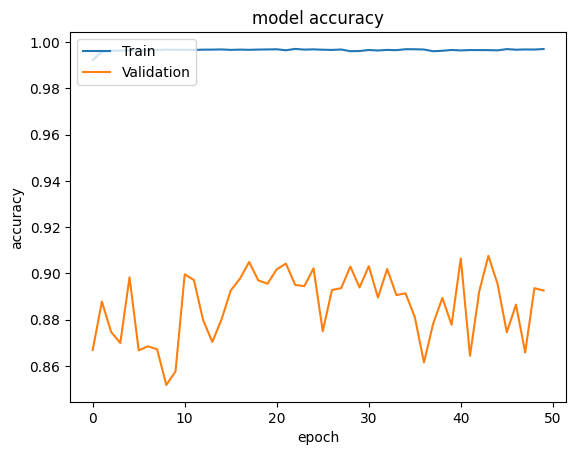

In [164]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(model.history['accuracy'])
plt.plot(model.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig('acc_withoutref.png')
plt.show()


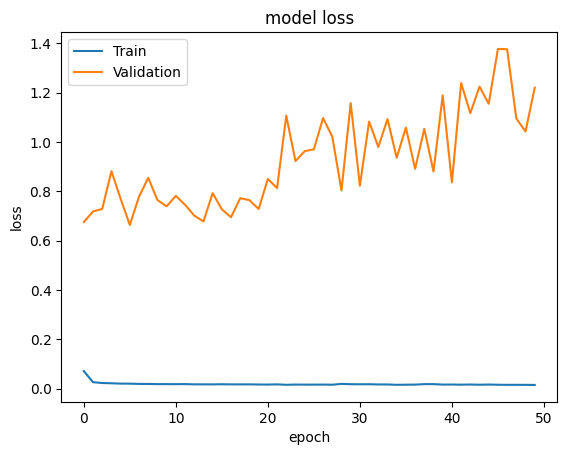

In [165]:
plt.plot(model.history['loss'])
plt.plot(model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig('loss_withoutref.png')
plt.show()

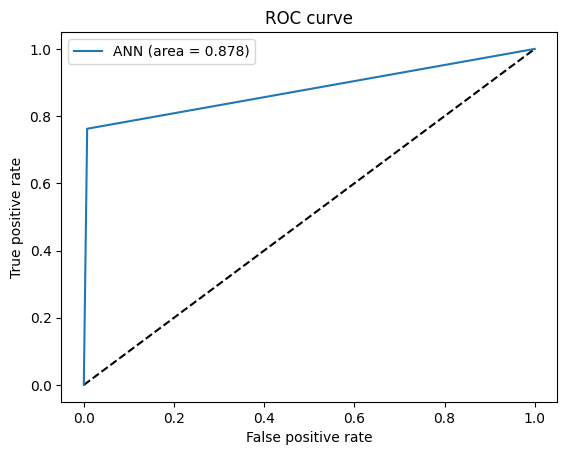

In [166]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from keras.models import Sequential
from keras.layers import Dense, Flatten, LSTM
from keras.layers import Conv1D, MaxPooling1D
fpr, tpr, thresholds = roc_curve(Y_DoS_test, y_pred)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='ANN (area = {:.3f})'.format(auc(fpr, tpr)))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

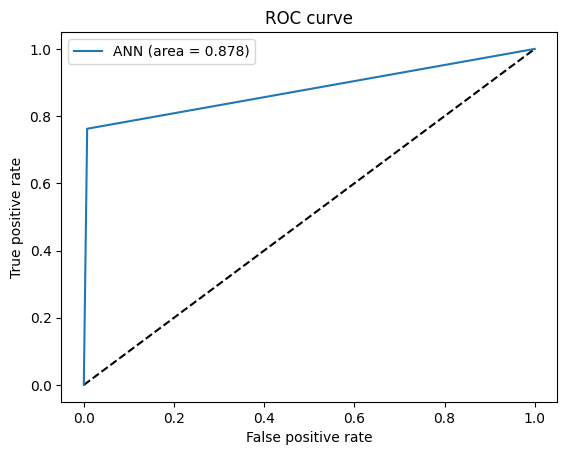

In [167]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='ANN (area = {:.3f})'.format(auc(fpr, tpr)))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

LSTM-CNN Without ref

In [168]:
X_DoS = np.array(X_DoS)
X_DoS_test = np.array(X_DoS_test)
#cnn-input
X_DoS = np.reshape(X_DoS, (X_DoS.shape[0], X_DoS.shape[1], 1))
X_DoS_test = np.reshape(X_DoS_test, (X_DoS_test.shape[0], X_DoS_test.shape[1], 1))
#lstm-input

In [169]:
Y_DoS = np.array(Y_DoS)

In [170]:
Y_DoS_test = np.array(Y_DoS_test)

In [171]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout, BatchNormalization
from keras.regularizers import l2
from keras.callbacks import EarlyStopping, LearningRateScheduler

In [172]:
# Define a learning rate schedule
initial_learning_rate = 0.001
def lr_schedule(epoch):
    return initial_learning_rate * (0.1 ** (epoch // 10))

In [173]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, LearningRateScheduler

# Define early stopping and learning rate scheduler callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_scheduler = LearningRateScheduler(lr_schedule)

# Define the rest of your callbacks
my_callbacks = [
    ModelCheckpoint(filepath='/content/drive/MyDrive/check/cnnlstmk_intrusion.h5', verbose=1, save_best_only=True, monitor='val_accuracy', mode='max'),
    early_stopping,
    lr_scheduler
]

In [174]:
# from keras.callbacks import ModelCheckpoint
# my_callbacks = [
#     ModelCheckpoint(filepath='/content/drive/MyDrive/check/cnnlstmk_intrusion.h5', verbose=1, save_best_only=True, monitor='val_accuracy', mode='max')
# ]

In [175]:
# from keras.models import Sequential
# from keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout
# from keras.regularizers import l2

# model = Sequential() # initializing model

# # cnn-lstm
# model.add(Conv1D(64, 3, padding="same", input_shape=(X_DoS.shape[1], 1), activation='relu', kernel_regularizer=l2(0.01)))
# model.add(Conv1D(64, 3, padding="same", activation='relu', kernel_regularizer=l2(0.01)))
# model.add(MaxPooling1D(pool_size=2))
# model.add(Conv1D(128, 3, padding="same", activation='relu', kernel_regularizer=l2(0.01)))
# model.add(Conv1D(128, 3, padding="same", activation='relu', kernel_regularizer=l2(0.01)))
# model.add(MaxPooling1D(pool_size=2))
# model.add(LSTM(units=100, return_sequences=False, dropout=0.1, kernel_regularizer=l2(0.01)))
# model.add(Dropout(0.5))  # Add dropout to reduce overfitting
# model.add(Dense(units=1, activation='sigmoid', kernel_regularizer=l2(0.01)))

# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# history = model.fit(X_DoS, Y_DoS, epochs=50, batch_size=64, validation_data=(X_DoS_test, Y_DoS_test), callbacks=[my_callbacks])


# Initialize the model
model = Sequential()

# Add Convolutional and MaxPooling Layers with L2 Regularization
model.add(Conv1D(64, 3, padding="same", input_shape=(X_DoS.shape[1], 1), activation='relu', kernel_regularizer=l2(0.01)))
model.add(Conv1D(64, 3, padding="same", activation='relu', kernel_regularizer=l2(0.01)))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(128, 3, padding="same", activation='relu', kernel_regularizer=l2(0.001)))
model.add(Conv1D(128, 3, padding="same", activation='relu', kernel_regularizer=l2(0.001)))
model.add(MaxPooling1D(pool_size=2))

# Add Batch Normalization
model.add(BatchNormalization())

# Add LSTM layer with L2 Regularization
model.add(LSTM(units=100, return_sequences=False, dropout=0.1, kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))  # Add dropout to reduce overfitting

# Add Dense layer with L2 Regularization
model.add(Dense(units=1, activation='sigmoid', kernel_regularizer=l2(0.01)))

# Compile the model with a custom learning rate schedule
opt = Adam(learning_rate=initial_learning_rate)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

# Train the model
history = model.fit(X_DoS, Y_DoS, epochs=50, batch_size=64, validation_data=(X_DoS_test, Y_DoS_test), callbacks=my_callbacks)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
1770/1770 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9761 - loss: 0.5260
Epoch 1: val_accuracy improved from -inf to 0.44426, saving model to /content/drive/MyDrive/check/cnnlstmk_intrusion.h5


1770/1770 ━━━━━━━━━━━━━━━━━━━━ 26s 11ms/step - accuracy: 0.9762 - loss: 0.5258 - val_accuracy: 0.4443 - val_loss: 3.2415 - learning_rate: 0.0010
Epoch 2/50
1769/1770 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9945 - loss: 0.0755
Epoch 2: val_accuracy improved from 0.44426 to 0.62860, saving model to /content/drive/MyDrive/check/cnnlstmk_intrusion.h5


1770/1770 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9945 - loss: 0.0755 - val_accuracy: 0.6286 - val_loss: 0.8755 - learning_rate: 0.0010
Epoch 3/50
1767/1770 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9963 - loss: 0.0561
Epoch 3: val_accuracy improved from 0.62860 to 0.90658, saving model to /content/drive/MyDrive/check/cnnlstmk_intrusion.h5


1770/1770 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9963 - loss: 0.0561 - val_accuracy: 0.9066 - val_loss: 0.4457 - learning_rate: 0.0010
Epoch 4/50
1770/1770 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9964 - loss: 0.0484
Epoch 4: val_accuracy did not improve from 0.90658
1770/1770 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.9963 - loss: 0.0484 - val_accuracy: 0.7875 - val_loss: 1.0059 - learning_rate: 0.0010
Epoch 5/50
1768/1770 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9975 - loss: 0.0409
Epoch 5: val_accuracy did not improve from 0.90658
1770/1770 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.9975 - loss: 0.0409 - val_accuracy: 0.5640 - val_loss: 2.5245 - learning_rate: 0.0010
Epoch 6/50
1769/1770 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9966 - loss: 0.0393
Epoch 6: val_accuracy did not improve from 0.90658
1770/1770 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9966 - loss: 0.0393 - val_accuracy: 0.8499 - val_loss: 0.9332 - learning_rate: 0.0010
Epo

1770/1770 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9970 - loss: 0.0349 - val_accuracy: 0.9130 - val_loss: 0.5055 - learning_rate: 0.0010
Epoch 10/50
1768/1770 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9964 - loss: 0.0371
Epoch 10: val_accuracy improved from 0.91305 to 0.91613, saving model to /content/drive/MyDrive/check/cnnlstmk_intrusion.h5


1770/1770 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.9964 - loss: 0.0371 - val_accuracy: 0.9161 - val_loss: 0.4120 - learning_rate: 0.0010
Epoch 11/50
1765/1770 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9984 - loss: 0.0274
Epoch 11: val_accuracy did not improve from 0.91613
1770/1770 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.9984 - loss: 0.0274 - val_accuracy: 0.8764 - val_loss: 0.6816 - learning_rate: 1.0000e-04
Epoch 12/50
1767/1770 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9987 - loss: 0.0251
Epoch 12: val_accuracy did not improve from 0.91613
1770/1770 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - accuracy: 0.9987 - loss: 0.0251 - val_accuracy: 0.8800 - val_loss: 0.7249 - learning_rate: 1.0000e-04
Epoch 13/50
1770/1770 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9989 - loss: 0.0229
Epoch 13: val_accuracy did not improve from 0.91613
1770/1770 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9989 - loss: 0.0229 - val_accuracy: 0.8924 - val_loss: 0.5903 - learning_ra

1770/1770 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9990 - loss: 0.0204 - val_accuracy: 0.9189 - val_loss: 0.4683 - learning_rate: 1.0000e-04
Epoch 16/50
1770/1770 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9990 - loss: 0.0201
Epoch 16: val_accuracy did not improve from 0.91887
1770/1770 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9990 - loss: 0.0201 - val_accuracy: 0.8948 - val_loss: 0.5901 - learning_rate: 1.0000e-04
Epoch 17/50
1770/1770 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9991 - loss: 0.0191
Epoch 17: val_accuracy did not improve from 0.91887
1770/1770 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.9991 - loss: 0.0191 - val_accuracy: 0.9088 - val_loss: 0.5344 - learning_rate: 1.0000e-04
Epoch 18/50
1769/1770 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9988 - loss: 0.0194
Epoch 18: val_accuracy did not improve from 0.91887
1770/1770 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.9988 - loss: 0.0194 - val_accuracy: 0.8688 - val_loss: 0.7453 - learnin

In [176]:
from keras.models import load_model
model = load_model('/content/drive/MyDrive/check/cnnlstmk_intrusion.h5')

In [177]:
y_pred = model.predict(X_DoS_test)

537/537 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


In [178]:
y_pred1 = []
for i in y_pred:
  if i>=0.5:
    y_pred1.append(1)
  else:
    y_pred1.append(0)

In [179]:
y_pred = np.array(y_pred1)
y_pred

array([1, 0, 0, ..., 0, 1, 0])

In [180]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(Y_DoS_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93      9711
           1       0.99      0.82      0.90      7459

    accuracy                           0.92     17170
   macro avg       0.93      0.91      0.92     17170
weighted avg       0.93      0.92      0.92     17170



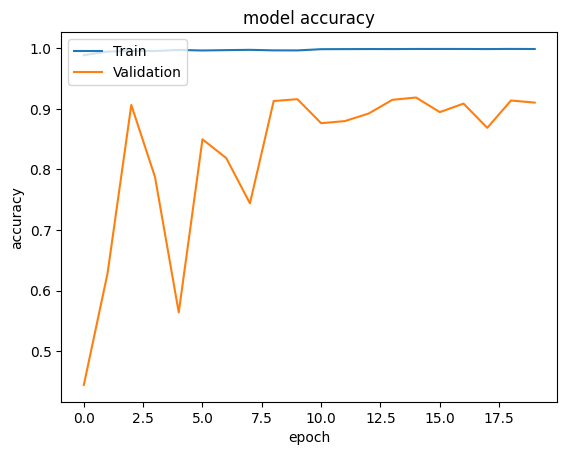

In [181]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig('acc_withoutref.png')
plt.show()


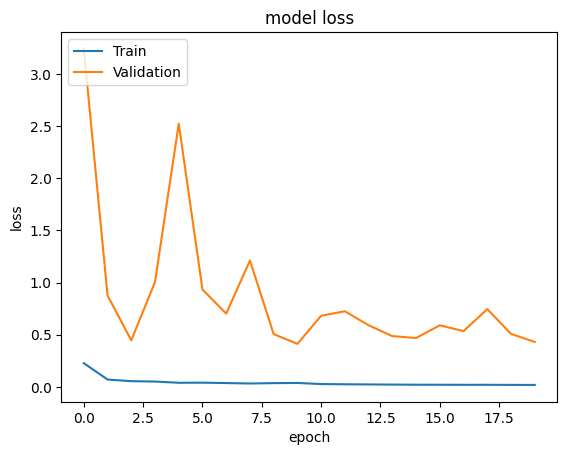

In [182]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig('loss_withoutref.png')
plt.show()

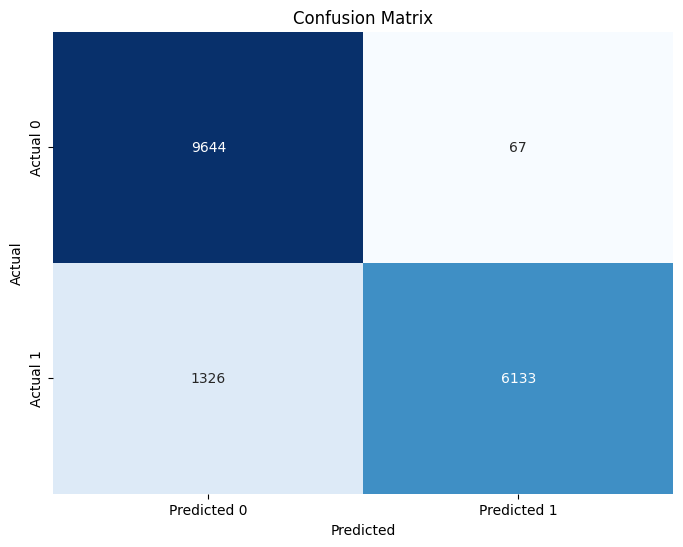

In [183]:
from matplotlib import pylab
from pylab import *
cm = confusion_matrix(Y_DoS_test, y_pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Predicted 0", "Predicted 1"],
            yticklabels=["Actual 0", "Actual 1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.savefig('heatmap_withoutref.png')
plt.show()

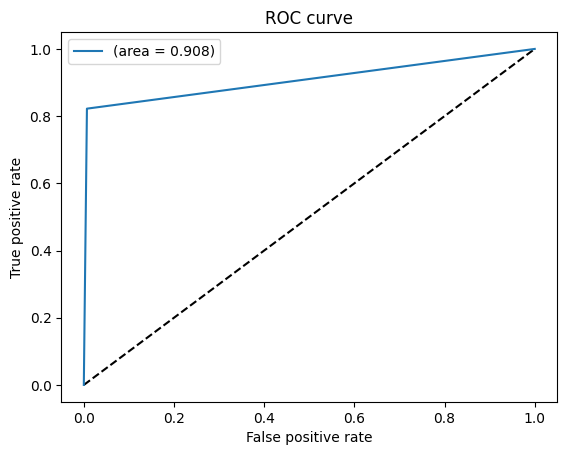

In [184]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from keras.models import Sequential
from keras.layers import Dense, Flatten, LSTM
from keras.layers import Conv1D, MaxPooling1D
fpr, tpr, thresholds = roc_curve(Y_DoS_test, y_pred)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='(area = {:.3f})'.format(auc(fpr, tpr)))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.savefig('roc_withoutref.png')
plt.show()

LSTM-CNN With ref

In [185]:
X_rfeDoS.shape

(113269, 13)

In [186]:
X_rfeDoS = np.array(X_rfeDoS)
X_DoS_test2 = np.array(X_DoS_test2)
#cnn-input
X_rfeDoS = np.reshape(X_rfeDoS, (X_rfeDoS.shape[0], X_rfeDoS.shape[1], 1))
X_DoS_test2 = np.reshape(X_DoS_test2, (X_DoS_test2.shape[0], X_DoS_test2.shape[1], 1))

In [187]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout, BatchNormalization
from keras.regularizers import l2
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, LearningRateScheduler

# Define a learning rate schedule
initial_learning_rate = 0.001
def lr_schedule(epoch):
    return initial_learning_rate * (0.1 ** (epoch // 10))


In [188]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, LearningRateScheduler

# Define early stopping and learning rate scheduler callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_scheduler = LearningRateScheduler(lr_schedule)

# Define the rest of your callbacks
my_callbacks = [
    ModelCheckpoint(filepath='/content/drive/MyDrive/chec/cnnlstmkref_intrusion.h5', verbose=1, save_best_only=True, monitor='val_accuracy', mode='max'),
    early_stopping,
    lr_scheduler
]

In [189]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout, BatchNormalization
from keras.regularizers import l2
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

# Define a learning rate schedule
initial_learning_rate = 0.001

# Initialize the model
model = Sequential()

input_shape = (X_rfeDoS.shape[1], 1)

# Convolutional layers
model.add(Conv1D(64, 3, padding="same", input_shape=input_shape, activation='relu', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv1D(128, 3, padding="same", activation='relu', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3))

model.add(Conv1D(256, 3, padding="same", activation='relu', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.4))

# LSTM layer
# model.add(GRU(units=150, return_sequences=False, dropout=0.25, recurrent_dropout=0.25))
model.add(LSTM(units=150, dropout=0.2, return_sequences=False))

# Dense layer
model.add(Dense(units=1, activation='sigmoid', kernel_regularizer=l2(0.01)))

# Compile the model
opt = Adam(learning_rate=initial_learning_rate)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

# Callbacks
# early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
# reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)
# callbacks_list = [early_stopping, reduce_lr]

# Train the model
history = model.fit(X_rfeDoS, Y_DoS, epochs=100, batch_size=250, validation_data=(X_DoS_test2, Y_DoS_test), callbacks=my_callbacks)

Epoch 1/100


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


454/454 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9708 - loss: 0.0973
Epoch 1: val_accuracy improved from -inf to 0.88026, saving model to /content/drive/MyDrive/chec/cnnlstmkref_intrusion.h5


454/454 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.9709 - loss: 0.0972 - val_accuracy: 0.8803 - val_loss: 0.5237 - learning_rate: 0.0010
Epoch 2/100
452/454 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9948 - loss: 0.0210
Epoch 2: val_accuracy improved from 0.88026 to 0.90221, saving model to /content/drive/MyDrive/chec/cnnlstmkref_intrusion.h5


454/454 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.9948 - loss: 0.0210 - val_accuracy: 0.9022 - val_loss: 0.5094 - learning_rate: 0.0010
Epoch 3/100
449/454 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9968 - loss: 0.0159
Epoch 3: val_accuracy improved from 0.90221 to 0.90448, saving model to /content/drive/MyDrive/chec/cnnlstmkref_intrusion.h5


454/454 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.9968 - loss: 0.0159 - val_accuracy: 0.9045 - val_loss: 0.4608 - learning_rate: 0.0010
Epoch 4/100
450/454 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9972 - loss: 0.0142
Epoch 4: val_accuracy improved from 0.90448 to 0.90600, saving model to /content/drive/MyDrive/chec/cnnlstmkref_intrusion.h5


454/454 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9972 - loss: 0.0142 - val_accuracy: 0.9060 - val_loss: 0.4835 - learning_rate: 0.0010
Epoch 5/100
451/454 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9974 - loss: 0.0136
Epoch 5: val_accuracy improved from 0.90600 to 0.90716, saving model to /content/drive/MyDrive/chec/cnnlstmkref_intrusion.h5


454/454 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.9974 - loss: 0.0136 - val_accuracy: 0.9072 - val_loss: 0.4666 - learning_rate: 0.0010
Epoch 6/100
450/454 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9980 - loss: 0.0127
Epoch 6: val_accuracy improved from 0.90716 to 0.91211, saving model to /content/drive/MyDrive/chec/cnnlstmkref_intrusion.h5


454/454 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9980 - loss: 0.0127 - val_accuracy: 0.9121 - val_loss: 0.4320 - learning_rate: 0.0010
Epoch 7/100
454/454 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9980 - loss: 0.0126
Epoch 7: val_accuracy did not improve from 0.91211
454/454 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.9980 - loss: 0.0126 - val_accuracy: 0.9048 - val_loss: 0.5353 - learning_rate: 0.0010
Epoch 8/100
450/454 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9981 - loss: 0.0118
Epoch 8: val_accuracy did not improve from 0.91211
454/454 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9981 - loss: 0.0118 - val_accuracy: 0.9040 - val_loss: 0.5016 - learning_rate: 0.0010
Epoch 9/100
450/454 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9983 - loss: 0.0113
Epoch 9: val_accuracy did not improve from 0.91211
454/454 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9983 - loss: 0.0113 - val_accuracy: 0.9121 - val_loss: 0.4416 - learning_rate: 0.0010
Epoch 10/100
451

In [190]:
from keras.models import load_model
model = load_model('/content/drive/MyDrive/chec/cnnlstmkref_intrusion.h5')

In [191]:
y_pred = model.predict(X_DoS_test2)

537/537 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


In [192]:
y_pred1 = []
for i in y_pred:
  if i>=0.5:
    y_pred1.append(1)
  else:
    y_pred1.append(0)

In [193]:
y_pred = np.array(y_pred1)
y_pred

array([1, 0, 0, ..., 0, 1, 0])

In [194]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(Y_DoS_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.99      0.93      9711
           1       0.99      0.81      0.89      7459

    accuracy                           0.91     17170
   macro avg       0.93      0.90      0.91     17170
weighted avg       0.92      0.91      0.91     17170



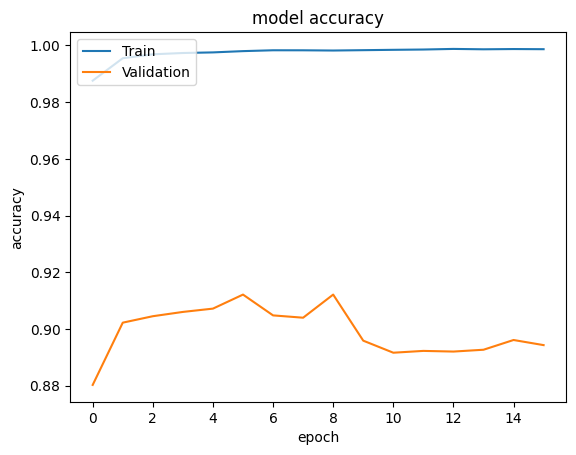

In [195]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig('acc_withref.png')
plt.show()


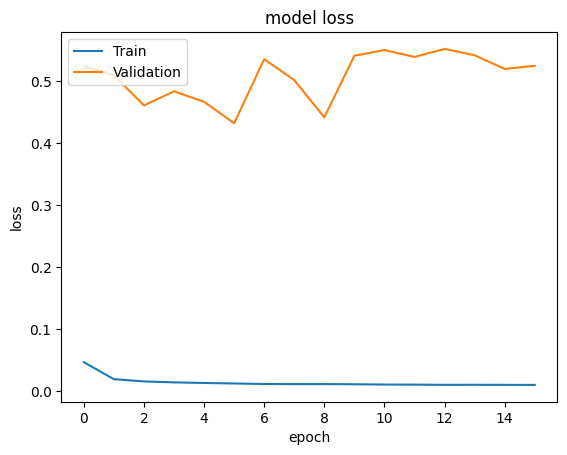

In [196]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig('loss_withref.png')
plt.show()

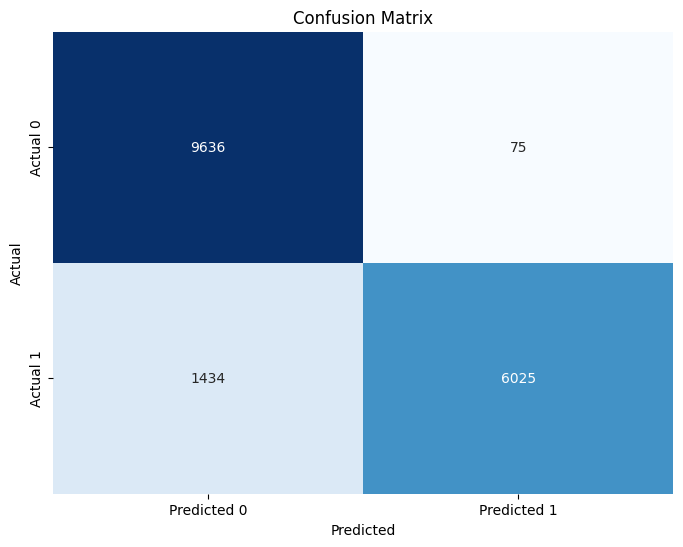

In [197]:
from matplotlib import pylab
from pylab import *
cm = confusion_matrix(Y_DoS_test, y_pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Predicted 0", "Predicted 1"],
            yticklabels=["Actual 0", "Actual 1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.savefig('heatmap_withref.png')
plt.show()

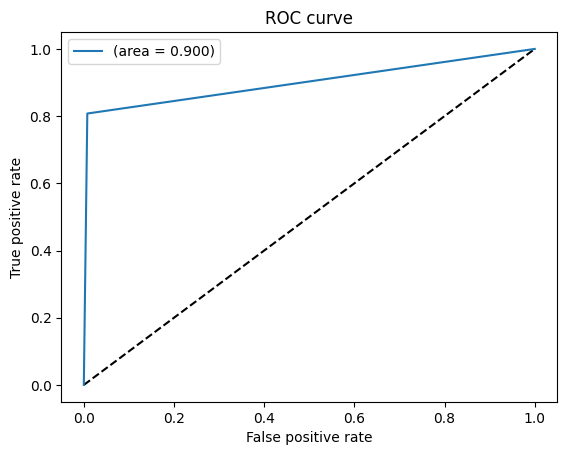

In [198]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from keras.models import Sequential
from keras.layers import Dense, Flatten, LSTM
from keras.layers import Conv1D, MaxPooling1D
fpr, tpr, thresholds = roc_curve(Y_DoS_test, y_pred)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='(area = {:.3f})'.format(auc(fpr, tpr)))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.savefig('roc_withref.png')

plt.show()

Bi-LSTM without ref

In [199]:
X_DoS = np.array(X_DoS)
X_DoS_test = np.array(X_DoS_test)
#cnn-input
X_DoS = np.reshape(X_DoS, (X_DoS.shape[0], X_DoS.shape[1], 1))
X_DoS_test = np.reshape(X_DoS_test, (X_DoS_test.shape[0], X_DoS_test.shape[1], 1))
#lstm-input

In [200]:
Y_DoS = np.array(Y_DoS)

In [201]:
Y_DoS_test = np.array(Y_DoS_test)

In [202]:
from keras.callbacks import ModelCheckpoint
my_callbacks = [
    ModelCheckpoint(filepath='/content/drive/MyDrive/check/bilstmk_intrusion.h5', verbose=1, save_best_only=True, monitor='val_accuracy', mode='max')
]

In [203]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dense
from tensorflow.keras.callbacks import Callback

# Initialize the model
model = Sequential()

# BiLSTM layer
model.add(Bidirectional(LSTM(units=100, dropout=0.2, return_sequences=False), input_shape=(X_DoS.shape[1], 1)))

# Output layer
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define your X_DoS, Y_DoS, X_DoS_test, Y_DoS_test data
# and your custom callback my_callbacks if needed

# Train the model
model.fit(X_DoS, Y_DoS, epochs=50, batch_size=250, validation_data=(X_DoS_test, Y_DoS_test), callbacks=[my_callbacks])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
454/454 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8838 - loss: 0.2777
Epoch 1: val_accuracy improved from -inf to 0.85189, saving model to /content/drive/MyDrive/check/bilstmk_intrusion.h5


454/454 ━━━━━━━━━━━━━━━━━━━━ 12s 23ms/step - accuracy: 0.8839 - loss: 0.2774 - val_accuracy: 0.8519 - val_loss: 0.4409
Epoch 2/50
454/454 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9675 - loss: 0.0689
Epoch 2: val_accuracy improved from 0.85189 to 0.89441, saving model to /content/drive/MyDrive/check/bilstmk_intrusion.h5


454/454 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - accuracy: 0.9675 - loss: 0.0689 - val_accuracy: 0.8944 - val_loss: 0.4093
Epoch 3/50
451/454 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9740 - loss: 0.0543
Epoch 3: val_accuracy did not improve from 0.89441
454/454 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.9740 - loss: 0.0543 - val_accuracy: 0.8804 - val_loss: 0.4406
Epoch 4/50
453/454 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9783 - loss: 0.0468
Epoch 4: val_accuracy did not improve from 0.89441
454/454 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.9783 - loss: 0.0468 - val_accuracy: 0.8709 - val_loss: 0.5790
Epoch 5/50
451/454 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9777 - loss: 0.0427
Epoch 5: val_accuracy did not improve from 0.89441
454/454 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.9777 - loss: 0.0427 - val_accuracy: 0.8924 - val_loss: 0.4604
Epoch 6/50
454/454 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9803 - loss: 0.0382
Epoch 6: val_accuracy imp

454/454 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - accuracy: 0.9803 - loss: 0.0382 - val_accuracy: 0.9123 - val_loss: 0.5793
Epoch 7/50
451/454 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9810 - loss: 0.0366
Epoch 7: val_accuracy did not improve from 0.91229
454/454 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.9810 - loss: 0.0366 - val_accuracy: 0.9108 - val_loss: 0.4558
Epoch 8/50
451/454 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9814 - loss: 0.0355
Epoch 8: val_accuracy did not improve from 0.91229
454/454 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - accuracy: 0.9814 - loss: 0.0356 - val_accuracy: 0.8965 - val_loss: 0.4996
Epoch 9/50
451/454 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9827 - loss: 0.0331
Epoch 9: val_accuracy did not improve from 0.91229
454/454 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - accuracy: 0.9827 - loss: 0.0331 - val_accuracy: 0.9087 - val_loss: 0.4841
Epoch 10/50
452/454 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9812 - loss: 0.0360
Epoch 10: val_accuracy d

454/454 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - accuracy: 0.9813 - loss: 0.0344 - val_accuracy: 0.9142 - val_loss: 0.4484
Epoch 13/50
454/454 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9826 - loss: 0.0310
Epoch 13: val_accuracy improved from 0.91421 to 0.93821, saving model to /content/drive/MyDrive/check/bilstmk_intrusion.h5


454/454 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - accuracy: 0.9826 - loss: 0.0310 - val_accuracy: 0.9382 - val_loss: 0.3493
Epoch 14/50
451/454 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9823 - loss: 0.0333
Epoch 14: val_accuracy did not improve from 0.93821
454/454 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.9823 - loss: 0.0333 - val_accuracy: 0.9059 - val_loss: 0.3805
Epoch 15/50
453/454 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9743 - loss: 0.0550
Epoch 15: val_accuracy did not improve from 0.93821
454/454 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.9743 - loss: 0.0551 - val_accuracy: 0.8840 - val_loss: 0.6577
Epoch 16/50
451/454 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9709 - loss: 0.0620
Epoch 16: val_accuracy did not improve from 0.93821
454/454 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.9709 - loss: 0.0620 - val_accuracy: 0.9191 - val_loss: 0.4581
Epoch 17/50
454/454 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9788 - loss: 0.0438
Epoch 17: val_accu

In [204]:
y_pred = model.predict(X_DoS_test)

537/537 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step


In [205]:
y_pred1 = []
for i in y_pred:
  if i>=0.5:
    y_pred1.append(1)
  else:
    y_pred1.append(0)

In [206]:
y_pred = np.array(y_pred1)
y_pred

array([1, 0, 0, ..., 0, 1, 0])

In [207]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(Y_DoS_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.99      0.92      9711
           1       0.98      0.80      0.88      7459

    accuracy                           0.91     17170
   macro avg       0.92      0.89      0.90     17170
weighted avg       0.92      0.91      0.91     17170



BI-LSTM With ref

In [208]:
X_rfeDoS.shape

(113269, 13, 1)

In [209]:
X_rfeDoS = np.array(X_rfeDoS)
X_DoS_test2 = np.array(X_DoS_test2)

In [210]:
X_rfeDoS = np.reshape(X_rfeDoS, (X_rfeDoS.shape[0], X_rfeDoS.shape[1], 1))
X_DoS_test2 = np.reshape(X_DoS_test2, (X_DoS_test2.shape[0], X_DoS_test2.shape[1], 1))

In [211]:
X_DoS_test2.shape

(17170, 13, 1)

In [212]:
X_rfeDoS.shape

(113269, 13, 1)

In [213]:
from keras.callbacks import ModelCheckpoint
my_callbacks = [
    ModelCheckpoint(filepath='/content/drive/MyDrive/check/bilstmkref_intrusion.h5', verbose=1, save_best_only=True, monitor='val_accuracy', mode='max')
]

In [214]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dense
from tensorflow.keras.callbacks import Callback

# Initialize the model
model = Sequential()

# BiLSTM layer
model.add(Bidirectional(LSTM(units=100, dropout=0.2, return_sequences=False), input_shape=(X_rfeDoS.shape[1], 1)))

# Output layer
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_rfeDoS, Y_DoS, epochs=50, batch_size=250, validation_data=(X_DoS_test2, Y_DoS_test), callbacks=[my_callbacks])

Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


454/454 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9006 - loss: 0.2886
Epoch 1: val_accuracy improved from -inf to 0.77234, saving model to /content/drive/MyDrive/check/bilstmkref_intrusion.h5


454/454 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.9007 - loss: 0.2883 - val_accuracy: 0.7723 - val_loss: 0.9617
Epoch 2/50
450/454 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9685 - loss: 0.0715
Epoch 2: val_accuracy improved from 0.77234 to 0.78899, saving model to /content/drive/MyDrive/check/bilstmkref_intrusion.h5


454/454 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9685 - loss: 0.0714 - val_accuracy: 0.7890 - val_loss: 1.0932
Epoch 3/50
451/454 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9750 - loss: 0.0539
Epoch 3: val_accuracy improved from 0.78899 to 0.82580, saving model to /content/drive/MyDrive/check/bilstmkref_intrusion.h5


454/454 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9750 - loss: 0.0538 - val_accuracy: 0.8258 - val_loss: 1.1409
Epoch 4/50
451/454 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9796 - loss: 0.0436
Epoch 4: val_accuracy improved from 0.82580 to 0.85265, saving model to /content/drive/MyDrive/check/bilstmkref_intrusion.h5


454/454 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9796 - loss: 0.0436 - val_accuracy: 0.8526 - val_loss: 0.8540
Epoch 5/50
450/454 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9808 - loss: 0.0383
Epoch 5: val_accuracy did not improve from 0.85265
454/454 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.9808 - loss: 0.0383 - val_accuracy: 0.8499 - val_loss: 1.1578
Epoch 6/50
452/454 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9793 - loss: 0.0408
Epoch 6: val_accuracy did not improve from 0.85265
454/454 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9793 - loss: 0.0408 - val_accuracy: 0.8520 - val_loss: 1.0658
Epoch 7/50
446/454 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9813 - loss: 0.0362
Epoch 7: val_accuracy did not improve from 0.85265
454/454 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9813 - loss: 0.0362 - val_accuracy: 0.8505 - val_loss: 1.1475
Epoch 8/50
450/454 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9803 - loss: 0.0368
Epoch 8: val_accuracy did not impr

454/454 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9811 - loss: 0.0349 - val_accuracy: 0.8531 - val_loss: 0.9415
Epoch 11/50
447/454 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9816 - loss: 0.0338
Epoch 11: val_accuracy did not improve from 0.85312
454/454 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9816 - loss: 0.0338 - val_accuracy: 0.8506 - val_loss: 1.0970
Epoch 12/50
447/454 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9820 - loss: 0.0341
Epoch 12: val_accuracy did not improve from 0.85312
454/454 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9819 - loss: 0.0341 - val_accuracy: 0.8457 - val_loss: 1.1359
Epoch 13/50
451/454 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9821 - loss: 0.0340
Epoch 13: val_accuracy improved from 0.85312 to 0.85317, saving model to /content/drive/MyDrive/check/bilstmkref_intrusion.h5


454/454 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9821 - loss: 0.0340 - val_accuracy: 0.8532 - val_loss: 0.8468
Epoch 14/50
446/454 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9822 - loss: 0.0337
Epoch 14: val_accuracy did not improve from 0.85317
454/454 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9822 - loss: 0.0337 - val_accuracy: 0.8491 - val_loss: 1.0659
Epoch 15/50
451/454 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9815 - loss: 0.0330
Epoch 15: val_accuracy did not improve from 0.85317
454/454 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9815 - loss: 0.0330 - val_accuracy: 0.8466 - val_loss: 1.0925
Epoch 16/50
451/454 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9822 - loss: 0.0326
Epoch 16: val_accuracy did not improve from 0.85317
454/454 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9822 - loss: 0.0326 - val_accuracy: 0.8521 - val_loss: 1.0628
Epoch 17/50
454/454 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9815 - loss: 0.0330
Epoch 17: val_accuracy did 

454/454 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9810 - loss: 0.0336 - val_accuracy: 0.8712 - val_loss: 0.8778
Epoch 21/50
446/454 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9806 - loss: 0.0346
Epoch 21: val_accuracy did not improve from 0.87123
454/454 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9806 - loss: 0.0345 - val_accuracy: 0.8493 - val_loss: 1.4668
Epoch 22/50
448/454 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9807 - loss: 0.0329
Epoch 22: val_accuracy did not improve from 0.87123
454/454 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9807 - loss: 0.0329 - val_accuracy: 0.8506 - val_loss: 1.0853
Epoch 23/50
453/454 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9818 - loss: 0.0326
Epoch 23: val_accuracy did not improve from 0.87123
454/454 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9818 - loss: 0.0326 - val_accuracy: 0.8501 - val_loss: 1.1628
Epoch 24/50
450/454 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9828 - loss: 0.0316
Epoch 24: val_accuracy did 

454/454 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9829 - loss: 0.0308 - val_accuracy: 0.8721 - val_loss: 1.1834
Epoch 38/50
449/454 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9828 - loss: 0.0298
Epoch 38: val_accuracy did not improve from 0.87210
454/454 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.9828 - loss: 0.0298 - val_accuracy: 0.8474 - val_loss: 1.4063
Epoch 39/50
453/454 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9823 - loss: 0.0312
Epoch 39: val_accuracy did not improve from 0.87210
454/454 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9823 - loss: 0.0312 - val_accuracy: 0.8660 - val_loss: 1.2056
Epoch 40/50
448/454 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9820 - loss: 0.0311
Epoch 40: val_accuracy did not improve from 0.87210
454/454 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9820 - loss: 0.0311 - val_accuracy: 0.8385 - val_loss: 0.9333
Epoch 41/50
452/454 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9828 - loss: 0.0311
Epoch 41: val_accuracy did 

In [215]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional_1 (Bidirectional) │ (None, 200)            │        81,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │           201 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 245,405 (958.62 KB)

 Trainable params: 81,801 (319.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 163,604 (639.08 KB)

In [216]:
y_pred = model.predict(X_DoS_test2)

537/537 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [217]:
y_pred1 = []
for i in y_pred:
  if i>=0.5:
    y_pred1.append(1)
  else:
    y_pred1.append(0)

In [218]:
y_pred = np.array(y_pred1)
y_pred

array([1, 0, 0, ..., 0, 0, 0])

In [219]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(Y_DoS_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.95      0.89      9711
           1       0.93      0.74      0.82      7459

    accuracy                           0.86     17170
   macro avg       0.88      0.85      0.86     17170
weighted avg       0.87      0.86      0.86     17170



GRU without ref

In [220]:
X_DoS = np.array(X_DoS)
X_DoS_test = np.array(X_DoS_test)
#cnn-input
X_DoS = np.reshape(X_DoS, (X_DoS.shape[0], X_DoS.shape[1], 1))
X_DoS_test = np.reshape(X_DoS_test, (X_DoS_test.shape[0], X_DoS_test.shape[1], 1))
#lstm-input

In [221]:
Y_DoS = np.array(Y_DoS)

In [222]:
Y_DoS_test = np.array(Y_DoS_test)

In [223]:
from keras.callbacks import ModelCheckpoint
my_callbacks = [
    ModelCheckpoint(filepath='/content/drive/MyDrive/check/gruk_intrusion.h5', verbose=1, save_best_only=True, monitor='val_accuracy', mode='max')
]

In [224]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from tensorflow.keras.callbacks import Callback

# Initialize the model
model = Sequential()

# GRU layers
model.add(GRU(units=64, dropout=0.2, return_sequences=True, input_shape=(X_DoS.shape[1], 1)))
model.add(GRU(units=128, dropout=0.2, return_sequences=False))

# Output layer
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define your X_DoS, Y_DoS, X_DoS_test, Y_DoS_test data
# and your custom callback my_callbacks if needed

# Train the model
model.fit(X_DoS, Y_DoS, epochs=50, batch_size=250, validation_data=(X_DoS_test, Y_DoS_test), callbacks=[my_callbacks])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
452/454 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8632 - loss: 0.3648
Epoch 1: val_accuracy improved from -inf to 0.56552, saving model to /content/drive/MyDrive/check/gruk_intrusion.h5


454/454 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - accuracy: 0.8632 - loss: 0.3645 - val_accuracy: 0.5655 - val_loss: 0.7103
Epoch 2/50
451/454 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8634 - loss: 0.3132
Epoch 2: val_accuracy did not improve from 0.56552
454/454 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.8634 - loss: 0.3132 - val_accuracy: 0.5644 - val_loss: 0.8375
Epoch 3/50
454/454 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8601 - loss: 0.3117
Epoch 3: val_accuracy improved from 0.56552 to 0.77455, saving model to /content/drive/MyDrive/check/gruk_intrusion.h5


454/454 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.8601 - loss: 0.3117 - val_accuracy: 0.7745 - val_loss: 0.6064
Epoch 4/50
454/454 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8622 - loss: 0.3089
Epoch 4: val_accuracy improved from 0.77455 to 0.87711, saving model to /content/drive/MyDrive/check/gruk_intrusion.h5


454/454 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.8622 - loss: 0.3089 - val_accuracy: 0.8771 - val_loss: 0.4740
Epoch 5/50
451/454 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8629 - loss: 0.3099
Epoch 5: val_accuracy did not improve from 0.87711
454/454 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.8628 - loss: 0.3100 - val_accuracy: 0.5656 - val_loss: 0.6986
Epoch 6/50
453/454 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8604 - loss: 0.3122
Epoch 6: val_accuracy did not improve from 0.87711
454/454 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.8604 - loss: 0.3122 - val_accuracy: 0.6328 - val_loss: 0.6375
Epoch 7/50
454/454 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8653 - loss: 0.2816
Epoch 7: val_accuracy did not improve from 0.87711
454/454 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.8653 - loss: 0.2815 - val_accuracy: 0.3015 - val_loss: 0.8088
Epoch 8/50
454/454 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8876 - loss: 0.2189
Epoch 8: val_accuracy di

454/454 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.9167 - loss: 0.1391 - val_accuracy: 0.8803 - val_loss: 0.4769
Epoch 28/50
454/454 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9175 - loss: 0.1371
Epoch 28: val_accuracy did not improve from 0.88026
454/454 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.9175 - loss: 0.1371 - val_accuracy: 0.8570 - val_loss: 0.5363
Epoch 29/50
454/454 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9179 - loss: 0.1363
Epoch 29: val_accuracy did not improve from 0.88026
454/454 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.9179 - loss: 0.1363 - val_accuracy: 0.8740 - val_loss: 0.5015
Epoch 30/50
453/454 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9197 - loss: 0.1371
Epoch 30: val_accuracy did not improve from 0.88026
454/454 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.9197 - loss: 0.1371 - val_accuracy: 0.8542 - val_loss: 0.6959
Epoch 31/50
454/454 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9192 - loss: 0.1373
Epoch 31: val_accu

454/454 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.9188 - loss: 0.1355 - val_accuracy: 0.8830 - val_loss: 0.4487
Epoch 49/50
453/454 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9183 - loss: 0.1360
Epoch 49: val_accuracy improved from 0.88299 to 0.88829, saving model to /content/drive/MyDrive/check/gruk_intrusion.h5


454/454 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.9183 - loss: 0.1360 - val_accuracy: 0.8883 - val_loss: 0.4450
Epoch 50/50
453/454 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9176 - loss: 0.1355
Epoch 50: val_accuracy did not improve from 0.88829
454/454 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.9176 - loss: 0.1355 - val_accuracy: 0.8704 - val_loss: 0.5404


In [225]:
y_pred = model.predict(X_DoS_test)

537/537 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step


In [226]:
y_pred1 = []
for i in y_pred:
  if i>=0.5:
    y_pred1.append(1)
  else:
    y_pred1.append(0)

In [227]:
y_pred = np.array(y_pred1)
y_pred

array([1, 0, 0, ..., 0, 0, 0])

In [228]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(Y_DoS_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.94      0.89      9711
           1       0.91      0.78      0.84      7459

    accuracy                           0.87     17170
   macro avg       0.88      0.86      0.87     17170
weighted avg       0.87      0.87      0.87     17170



GRU with ref

In [229]:
X_rfeDoS.shape

(113269, 13, 1)

In [230]:
X_rfeDoS = np.array(X_rfeDoS)
X_DoS_test2 = np.array(X_DoS_test2)
#cnn-input
X_rfeDoS = np.reshape(X_rfeDoS, (X_rfeDoS.shape[0], X_rfeDoS.shape[1], 1))
X_DoS_test2 = np.reshape(X_DoS_test2, (X_DoS_test2.shape[0], X_DoS_test2.shape[1], 1))

In [231]:
from keras.callbacks import ModelCheckpoint
my_callbacks = [
    ModelCheckpoint(filepath='/content/drive/MyDrive/check/grukref_intrusion.h5', verbose=1, save_best_only=True, monitor='val_accuracy', mode='max')
]

In [232]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from tensorflow.keras.callbacks import Callback

# Initialize the model
model = Sequential()

# GRU layers
model.add(GRU(units=64, dropout=0.2, return_sequences=True, input_shape=(X_rfeDoS.shape[1], 1)))
model.add(GRU(units=128, dropout=0.2, return_sequences=False))

# Output layer
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define your X_DoS, Y_DoS, X_DoS_test, Y_DoS_test data
# and your custom callback my_callbacks if needed

# Train the model
model.fit(X_rfeDoS, Y_DoS, epochs=50, batch_size=250, validation_data=(X_DoS_test2, Y_DoS_test), callbacks=[my_callbacks])


Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


454/454 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8614 - loss: 0.3169
Epoch 1: val_accuracy improved from -inf to 0.85679, saving model to /content/drive/MyDrive/check/grukref_intrusion.h5


454/454 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8615 - loss: 0.3166 - val_accuracy: 0.8568 - val_loss: 0.8476
Epoch 2/50
449/454 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9152 - loss: 0.1489
Epoch 2: val_accuracy improved from 0.85679 to 0.85842, saving model to /content/drive/MyDrive/check/grukref_intrusion.h5


454/454 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9152 - loss: 0.1489 - val_accuracy: 0.8584 - val_loss: 0.8598
Epoch 3/50
450/454 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9156 - loss: 0.1445
Epoch 3: val_accuracy improved from 0.85842 to 0.86395, saving model to /content/drive/MyDrive/check/grukref_intrusion.h5


454/454 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9156 - loss: 0.1444 - val_accuracy: 0.8639 - val_loss: 0.7695
Epoch 4/50
450/454 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9173 - loss: 0.1441
Epoch 4: val_accuracy improved from 0.86395 to 0.86645, saving model to /content/drive/MyDrive/check/grukref_intrusion.h5


454/454 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9173 - loss: 0.1441 - val_accuracy: 0.8665 - val_loss: 0.7148
Epoch 5/50
452/454 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9171 - loss: 0.1408
Epoch 5: val_accuracy improved from 0.86645 to 0.86890, saving model to /content/drive/MyDrive/check/grukref_intrusion.h5


454/454 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9171 - loss: 0.1408 - val_accuracy: 0.8689 - val_loss: 0.7466
Epoch 6/50
451/454 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9177 - loss: 0.1411
Epoch 6: val_accuracy improved from 0.86890 to 0.88031, saving model to /content/drive/MyDrive/check/grukref_intrusion.h5


454/454 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9177 - loss: 0.1411 - val_accuracy: 0.8803 - val_loss: 0.6651
Epoch 7/50
454/454 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9174 - loss: 0.1398
Epoch 7: val_accuracy did not improve from 0.88031
454/454 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9174 - loss: 0.1398 - val_accuracy: 0.8664 - val_loss: 0.7293
Epoch 8/50
451/454 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9165 - loss: 0.1418
Epoch 8: val_accuracy improved from 0.88031 to 0.88090, saving model to /content/drive/MyDrive/check/grukref_intrusion.h5


454/454 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9165 - loss: 0.1418 - val_accuracy: 0.8809 - val_loss: 0.6462
Epoch 9/50
452/454 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9158 - loss: 0.1409
Epoch 9: val_accuracy did not improve from 0.88090
454/454 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9158 - loss: 0.1409 - val_accuracy: 0.8779 - val_loss: 0.7990
Epoch 10/50
454/454 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9194 - loss: 0.1383
Epoch 10: val_accuracy did not improve from 0.88090
454/454 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9194 - loss: 0.1383 - val_accuracy: 0.8632 - val_loss: 0.9036
Epoch 11/50
447/454 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9177 - loss: 0.1402
Epoch 11: val_accuracy did not improve from 0.88090
454/454 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9176 - loss: 0.1402 - val_accuracy: 0.8694 - val_loss: 0.8731
Epoch 12/50
454/454 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9188 - loss: 0.1380
Epoch 12: val_accuracy did not

454/454 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.9197 - loss: 0.1364 - val_accuracy: 0.9152 - val_loss: 0.6349
Epoch 28/50
447/454 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9163 - loss: 0.1384
Epoch 28: val_accuracy did not improve from 0.91520
454/454 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9163 - loss: 0.1384 - val_accuracy: 0.8691 - val_loss: 0.9684
Epoch 29/50
448/454 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9164 - loss: 0.1398
Epoch 29: val_accuracy did not improve from 0.91520
454/454 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9164 - loss: 0.1398 - val_accuracy: 0.8652 - val_loss: 0.8222
Epoch 30/50
450/454 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9174 - loss: 0.1382
Epoch 30: val_accuracy did not improve from 0.91520
454/454 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9174 - loss: 0.1382 - val_accuracy: 0.8647 - val_loss: 0.9975
Epoch 31/50
450/454 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9182 - loss: 0.1369
Epoch 31: val_accuracy did 

In [233]:
y_pred = model.predict(X_DoS_test2)

537/537 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


In [234]:
y_pred1 = []
for i in y_pred:
  if i>=0.5:
    y_pred1.append(1)
  else:
    y_pred1.append(0)

In [235]:
y_pred = np.array(y_pred1)
y_pred

array([1, 0, 0, ..., 0, 0, 0])

In [236]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(Y_DoS_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.99      0.90      9711
           1       0.98      0.72      0.83      7459

    accuracy                           0.87     17170
   macro avg       0.90      0.85      0.86     17170
weighted avg       0.89      0.87      0.87     17170



BiGRU without ref

In [237]:
X_DoS = np.array(X_DoS)
X_DoS_test = np.array(X_DoS_test)
#cnn-input
X_DoS = np.reshape(X_DoS, (X_DoS.shape[0], X_DoS.shape[1], 1))
X_DoS_test = np.reshape(X_DoS_test, (X_DoS_test.shape[0], X_DoS_test.shape[1], 1))
#lstm-input

In [238]:
Y_DoS = np.array(Y_DoS)

In [239]:
Y_DoS_test = np.array(Y_DoS_test)

In [240]:
from keras.callbacks import ModelCheckpoint
my_callbacks = [
    ModelCheckpoint(filepath='/content/drive/MyDrive/check/bigruk_intrusion.h5', verbose=1, save_best_only=True, monitor='val_accuracy', mode='max')
]

In [241]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, GRU, Dense
from tensorflow.keras.callbacks import Callback


# Initialize the model
model = Sequential()

# Bidirectional GRU layers
model.add(Bidirectional(GRU(units=64, dropout=0.2, return_sequences=True), input_shape=(X_DoS.shape[1], 1)))
model.add(Bidirectional(GRU(units=128, dropout=0.2, return_sequences=False)))

# Output layer
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define your X_DoS, Y_DoS, X_DoS_test, Y_DoS_test data
# and your custom callback my_callbacks if needed

# Train the model
model.fit(X_DoS, Y_DoS, epochs=50, batch_size=250, validation_data=(X_DoS_test, Y_DoS_test), callbacks=[my_callbacks])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
454/454 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.9099 - loss: 0.2037
Epoch 1: val_accuracy improved from -inf to 0.82877, saving model to /content/drive/MyDrive/check/bigruk_intrusion.h5


454/454 ━━━━━━━━━━━━━━━━━━━━ 22s 41ms/step - accuracy: 0.9100 - loss: 0.2035 - val_accuracy: 0.8288 - val_loss: 0.6360
Epoch 2/50
453/454 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.9778 - loss: 0.0457
Epoch 2: val_accuracy improved from 0.82877 to 0.87723, saving model to /content/drive/MyDrive/check/bigruk_intrusion.h5


454/454 ━━━━━━━━━━━━━━━━━━━━ 18s 41ms/step - accuracy: 0.9778 - loss: 0.0457 - val_accuracy: 0.8772 - val_loss: 0.9110
Epoch 3/50
453/454 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.9789 - loss: 0.0387
Epoch 3: val_accuracy did not improve from 0.87723
454/454 ━━━━━━━━━━━━━━━━━━━━ 20s 39ms/step - accuracy: 0.9789 - loss: 0.0387 - val_accuracy: 0.8545 - val_loss: 0.7659
Epoch 4/50
453/454 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.9815 - loss: 0.0345
Epoch 4: val_accuracy improved from 0.87723 to 0.89575, saving model to /content/drive/MyDrive/check/bigruk_intrusion.h5


454/454 ━━━━━━━━━━━━━━━━━━━━ 18s 40ms/step - accuracy: 0.9815 - loss: 0.0345 - val_accuracy: 0.8957 - val_loss: 0.8455
Epoch 5/50
453/454 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.9827 - loss: 0.0311
Epoch 5: val_accuracy improved from 0.89575 to 0.90641, saving model to /content/drive/MyDrive/check/bigruk_intrusion.h5


454/454 ━━━━━━━━━━━━━━━━━━━━ 20s 40ms/step - accuracy: 0.9827 - loss: 0.0311 - val_accuracy: 0.9064 - val_loss: 0.8689
Epoch 6/50
453/454 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.9829 - loss: 0.0310
Epoch 6: val_accuracy did not improve from 0.90641
454/454 ━━━━━━━━━━━━━━━━━━━━ 18s 40ms/step - accuracy: 0.9829 - loss: 0.0310 - val_accuracy: 0.9032 - val_loss: 1.0179
Epoch 7/50
454/454 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.9819 - loss: 0.0317
Epoch 7: val_accuracy did not improve from 0.90641
454/454 ━━━━━━━━━━━━━━━━━━━━ 20s 39ms/step - accuracy: 0.9819 - loss: 0.0317 - val_accuracy: 0.8979 - val_loss: 0.8950
Epoch 8/50
453/454 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.9824 - loss: 0.0319
Epoch 8: val_accuracy did not improve from 0.90641
454/454 ━━━━━━━━━━━━━━━━━━━━ 21s 39ms/step - accuracy: 0.9824 - loss: 0.0319 - val_accuracy: 0.9023 - val_loss: 0.9928
Epoch 9/50
454/454 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.9811 - loss: 0.0335
Epoch 9: val_accuracy d

454/454 ━━━━━━━━━━━━━━━━━━━━ 21s 41ms/step - accuracy: 0.9818 - loss: 0.0321 - val_accuracy: 0.9107 - val_loss: 0.8947
Epoch 11/50
453/454 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.9827 - loss: 0.0300
Epoch 11: val_accuracy improved from 0.91066 to 0.91077, saving model to /content/drive/MyDrive/check/bigruk_intrusion.h5


454/454 ━━━━━━━━━━━━━━━━━━━━ 20s 40ms/step - accuracy: 0.9827 - loss: 0.0300 - val_accuracy: 0.9108 - val_loss: 0.8783
Epoch 12/50
453/454 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.9834 - loss: 0.0297
Epoch 12: val_accuracy did not improve from 0.91077
454/454 ━━━━━━━━━━━━━━━━━━━━ 21s 40ms/step - accuracy: 0.9834 - loss: 0.0297 - val_accuracy: 0.9061 - val_loss: 0.8507
Epoch 13/50
453/454 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.9816 - loss: 0.0308
Epoch 13: val_accuracy did not improve from 0.91077
454/454 ━━━━━━━━━━━━━━━━━━━━ 20s 39ms/step - accuracy: 0.9816 - loss: 0.0308 - val_accuracy: 0.9077 - val_loss: 0.9269
Epoch 14/50
454/454 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.9816 - loss: 0.0307
Epoch 14: val_accuracy improved from 0.91077 to 0.91305, saving model to /content/drive/MyDrive/check/bigruk_intrusion.h5


454/454 ━━━━━━━━━━━━━━━━━━━━ 21s 41ms/step - accuracy: 0.9816 - loss: 0.0307 - val_accuracy: 0.9130 - val_loss: 0.8223
Epoch 15/50
453/454 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.9829 - loss: 0.0294
Epoch 15: val_accuracy did not improve from 0.91305
454/454 ━━━━━━━━━━━━━━━━━━━━ 20s 39ms/step - accuracy: 0.9829 - loss: 0.0294 - val_accuracy: 0.9090 - val_loss: 1.0276
Epoch 16/50
453/454 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.9829 - loss: 0.0290
Epoch 16: val_accuracy did not improve from 0.91305
454/454 ━━━━━━━━━━━━━━━━━━━━ 20s 39ms/step - accuracy: 0.9829 - loss: 0.0290 - val_accuracy: 0.9111 - val_loss: 0.9965
Epoch 17/50
454/454 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.9825 - loss: 0.0298
Epoch 17: val_accuracy did not improve from 0.91305
454/454 ━━━━━━━━━━━━━━━━━━━━ 21s 40ms/step - accuracy: 0.9825 - loss: 0.0298 - val_accuracy: 0.9093 - val_loss: 0.9621
Epoch 18/50
453/454 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.9828 - loss: 0.0295
Epoch 18: val_ac

454/454 ━━━━━━━━━━━━━━━━━━━━ 18s 40ms/step - accuracy: 0.9828 - loss: 0.0293 - val_accuracy: 0.9139 - val_loss: 0.9992


In [242]:
y_pred = model.predict(X_DoS_test)

537/537 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step


In [243]:
y_pred1 = []
for i in y_pred:
  if i>=0.5:
    y_pred1.append(1)
  else:
    y_pred1.append(0)

In [244]:
y_pred = np.array(y_pred1)
y_pred

array([1, 0, 0, ..., 0, 1, 0])

In [245]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(Y_DoS_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.99      0.93      9711
           1       0.99      0.81      0.89      7459

    accuracy                           0.91     17170
   macro avg       0.93      0.90      0.91     17170
weighted avg       0.92      0.91      0.91     17170



BIGRU with ref

In [246]:
X_rfeDoS.shape

(113269, 13, 1)

In [247]:
X_rfeDoS = np.array(X_rfeDoS)
X_DoS_test2 = np.array(X_DoS_test2)
#cnn-input
X_rfeDoS = np.reshape(X_rfeDoS, (X_rfeDoS.shape[0], X_rfeDoS.shape[1], 1))
X_DoS_test2 = np.reshape(X_DoS_test2, (X_DoS_test2.shape[0], X_DoS_test2.shape[1], 1))

In [248]:
from keras.callbacks import ModelCheckpoint
my_callbacks = [
    ModelCheckpoint(filepath='/content/drive/MyDrive/check/bigrukref_intrusion.h5', verbose=1, save_best_only=True, monitor='val_accuracy', mode='max')
]

In [249]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, GRU, Dense
from tensorflow.keras.callbacks import Callback


# Initialize the model
model = Sequential()

# Bidirectional GRU layers
model.add(Bidirectional(GRU(units=64, dropout=0.2, return_sequences=True), input_shape=(X_rfeDoS.shape[1], 1)))
model.add(Bidirectional(GRU(units=128, dropout=0.2, return_sequences=False)))

# Output layer
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define your X_DoS, Y_DoS, X_DoS_test, Y_DoS_test data
# and your custom callback my_callbacks if needed

# Train the model
model.fit(X_rfeDoS, Y_DoS, epochs=50, batch_size=250, validation_data=(X_DoS_test2, Y_DoS_test), callbacks=[my_callbacks])

Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


454/454 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9207 - loss: 0.2017
Epoch 1: val_accuracy improved from -inf to 0.85055, saving model to /content/drive/MyDrive/check/bigrukref_intrusion.h5


454/454 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.9208 - loss: 0.2015 - val_accuracy: 0.8506 - val_loss: 0.7036
Epoch 2/50
450/454 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9803 - loss: 0.0391
Epoch 2: val_accuracy did not improve from 0.85055
454/454 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9803 - loss: 0.0391 - val_accuracy: 0.8492 - val_loss: 1.0442
Epoch 3/50
453/454 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9791 - loss: 0.0362
Epoch 3: val_accuracy improved from 0.85055 to 0.85393, saving model to /content/drive/MyDrive/check/bigrukref_intrusion.h5


454/454 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9791 - loss: 0.0362 - val_accuracy: 0.8539 - val_loss: 0.9313
Epoch 4/50
452/454 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9813 - loss: 0.0352
Epoch 4: val_accuracy improved from 0.85393 to 0.85556, saving model to /content/drive/MyDrive/check/bigrukref_intrusion.h5


454/454 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9813 - loss: 0.0352 - val_accuracy: 0.8556 - val_loss: 0.8789
Epoch 5/50
454/454 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9815 - loss: 0.0341
Epoch 5: val_accuracy improved from 0.85556 to 0.85877, saving model to /content/drive/MyDrive/check/bigrukref_intrusion.h5


454/454 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9815 - loss: 0.0341 - val_accuracy: 0.8588 - val_loss: 0.7117
Epoch 6/50
454/454 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9803 - loss: 0.0342
Epoch 6: val_accuracy did not improve from 0.85877
454/454 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9803 - loss: 0.0342 - val_accuracy: 0.8525 - val_loss: 0.8448
Epoch 7/50
451/454 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9812 - loss: 0.0338
Epoch 7: val_accuracy did not improve from 0.85877
454/454 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9812 - loss: 0.0338 - val_accuracy: 0.8544 - val_loss: 0.8623
Epoch 8/50
449/454 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9810 - loss: 0.0330
Epoch 8: val_accuracy did not improve from 0.85877
454/454 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9810 - loss: 0.0330 - val_accuracy: 0.8573 - val_loss: 0.7804
Epoch 9/50
450/454 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9826 - loss: 0.0320
Epoch 9: val_accuracy did no

454/454 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9830 - loss: 0.0316 - val_accuracy: 0.8608 - val_loss: 0.8016
Epoch 11/50
452/454 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9829 - loss: 0.0299
Epoch 11: val_accuracy improved from 0.86080 to 0.86698, saving model to /content/drive/MyDrive/check/bigrukref_intrusion.h5


454/454 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9829 - loss: 0.0299 - val_accuracy: 0.8670 - val_loss: 0.8250
Epoch 12/50
452/454 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9826 - loss: 0.0310
Epoch 12: val_accuracy did not improve from 0.86698
454/454 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9826 - loss: 0.0310 - val_accuracy: 0.8560 - val_loss: 0.8705
Epoch 13/50
452/454 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9828 - loss: 0.0309
Epoch 13: val_accuracy did not improve from 0.86698
454/454 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.9828 - loss: 0.0309 - val_accuracy: 0.8606 - val_loss: 0.6836
Epoch 14/50
450/454 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9824 - loss: 0.0312
Epoch 14: val_accuracy improved from 0.86698 to 0.90012, saving model to /content/drive/MyDrive/check/bigrukref_intrusion.h5


454/454 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9824 - loss: 0.0312 - val_accuracy: 0.9001 - val_loss: 0.5894
Epoch 15/50
454/454 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9827 - loss: 0.0303
Epoch 15: val_accuracy did not improve from 0.90012
454/454 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9827 - loss: 0.0303 - val_accuracy: 0.8592 - val_loss: 0.7398
Epoch 16/50
452/454 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9830 - loss: 0.0298
Epoch 16: val_accuracy did not improve from 0.90012
454/454 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.9830 - loss: 0.0298 - val_accuracy: 0.8608 - val_loss: 0.7303
Epoch 17/50
453/454 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9820 - loss: 0.0314
Epoch 17: val_accuracy did not improve from 0.90012
454/454 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.9820 - loss: 0.0314 - val_accuracy: 0.8581 - val_loss: 0.7040
Epoch 18/50
453/454 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9828 - loss: 0.0312
Epoch 18: val_acc

454/454 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.9828 - loss: 0.0298 - val_accuracy: 0.9075 - val_loss: 0.6398
Epoch 34/50
451/454 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9826 - loss: 0.0300
Epoch 34: val_accuracy did not improve from 0.90751
454/454 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9826 - loss: 0.0300 - val_accuracy: 0.8930 - val_loss: 0.7319
Epoch 35/50
450/454 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9829 - loss: 0.0287
Epoch 35: val_accuracy did not improve from 0.90751
454/454 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9829 - loss: 0.0287 - val_accuracy: 0.8812 - val_loss: 0.7476
Epoch 36/50
452/454 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9823 - loss: 0.0315
Epoch 36: val_accuracy did not improve from 0.90751
454/454 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.9823 - loss: 0.0315 - val_accuracy: 0.8740 - val_loss: 0.6763
Epoch 37/50
450/454 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9834 - loss: 0.0289
Epoch 37: val_accu

454/454 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9832 - loss: 0.0290 - val_accuracy: 0.9109 - val_loss: 0.6041
Epoch 45/50
449/454 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9830 - loss: 0.0295 
Epoch 45: val_accuracy did not improve from 0.91089
454/454 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9830 - loss: 0.0295 - val_accuracy: 0.8613 - val_loss: 0.8206
Epoch 46/50
451/454 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9830 - loss: 0.0295
Epoch 46: val_accuracy did not improve from 0.91089
454/454 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9830 - loss: 0.0295 - val_accuracy: 0.8973 - val_loss: 0.7002
Epoch 47/50
449/454 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9827 - loss: 0.0290
Epoch 47: val_accuracy did not improve from 0.91089
454/454 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.9827 - loss: 0.0290 - val_accuracy: 0.8851 - val_loss: 0.7408
Epoch 48/50
450/454 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9829 - loss: 0.0290
Epoch 48: val_accur

In [250]:
y_pred = model.predict(X_DoS_test2)

537/537 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


In [251]:
y_pred1 = []
for i in y_pred:
  if i>=0.5:
    y_pred1.append(1)
  else:
    y_pred1.append(0)

In [252]:
y_pred = np.array(y_pred1)
y_pred

array([1, 0, 0, ..., 0, 0, 0])

In [253]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(Y_DoS_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.99      0.90      9711
           1       0.99      0.71      0.83      7459

    accuracy                           0.87     17170
   macro avg       0.90      0.85      0.86     17170
weighted avg       0.89      0.87      0.87     17170



LSTM without ref

In [254]:
X_DoS = np.array(X_DoS)
X_DoS_test = np.array(X_DoS_test)
#cnn-input
X_DoS = np.reshape(X_DoS, (X_DoS.shape[0], X_DoS.shape[1], 1))
X_DoS_test = np.reshape(X_DoS_test, (X_DoS_test.shape[0], X_DoS_test.shape[1], 1))
#lstm-input

In [255]:
Y_DoS = np.array(Y_DoS)

In [256]:
Y_DoS_test = np.array(Y_DoS_test)

In [257]:
from keras.callbacks import ModelCheckpoint
my_callbacks = [
    ModelCheckpoint(filepath='/content/drive/MyDrive/check/lstmk_intrusion.h5', verbose=1, save_best_only=True, monitor='val_accuracy', mode='max')
]

In [258]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import Callback


# Initialize the model
model = Sequential()

# LSTM layers
model.add(LSTM(units=64, dropout=0.2, return_sequences=True, input_shape=(X_DoS.shape[1], 1)))
model.add(LSTM(units=128, dropout=0.2, return_sequences=False))

# Output layer
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define your X_DoS, Y_DoS, X_DoS_test, Y_DoS_test data
# and your custom callback my_callbacks if needed

# Train the model
model.fit(X_DoS, Y_DoS, epochs=50, batch_size=250, validation_data=(X_DoS_test, Y_DoS_test), callbacks=[my_callbacks])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
454/454 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8174 - loss: 0.3619
Epoch 1: val_accuracy improved from -inf to 0.19621, saving model to /content/drive/MyDrive/check/lstmk_intrusion.h5


454/454 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - accuracy: 0.8175 - loss: 0.3617 - val_accuracy: 0.1962 - val_loss: 3.9822
Epoch 2/50
453/454 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9076 - loss: 0.1754
Epoch 2: val_accuracy improved from 0.19621 to 0.20751, saving model to /content/drive/MyDrive/check/lstmk_intrusion.h5


454/454 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.9077 - loss: 0.1754 - val_accuracy: 0.2075 - val_loss: 3.7521
Epoch 3/50
451/454 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9154 - loss: 0.1576
Epoch 3: val_accuracy did not improve from 0.20751
454/454 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.9154 - loss: 0.1576 - val_accuracy: 0.1792 - val_loss: 3.7204
Epoch 4/50
453/454 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9128 - loss: 0.1545
Epoch 4: val_accuracy did not improve from 0.20751
454/454 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.9128 - loss: 0.1545 - val_accuracy: 0.1648 - val_loss: 4.5501
Epoch 5/50
451/454 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9142 - loss: 0.1594
Epoch 5: val_accuracy improved from 0.20751 to 0.45195, saving model to /content/drive/MyDrive/check/lstmk_intrusion.h5


454/454 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.9142 - loss: 0.1593 - val_accuracy: 0.4520 - val_loss: 2.6310
Epoch 6/50
453/454 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9159 - loss: 0.1509
Epoch 6: val_accuracy improved from 0.45195 to 0.64584, saving model to /content/drive/MyDrive/check/lstmk_intrusion.h5


454/454 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.9159 - loss: 0.1510 - val_accuracy: 0.6458 - val_loss: 1.7758
Epoch 7/50
454/454 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9141 - loss: 0.1547
Epoch 7: val_accuracy did not improve from 0.64584
454/454 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.9141 - loss: 0.1547 - val_accuracy: 0.2763 - val_loss: 2.8802
Epoch 8/50
454/454 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9165 - loss: 0.1466
Epoch 8: val_accuracy did not improve from 0.64584
454/454 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.9165 - loss: 0.1466 - val_accuracy: 0.2530 - val_loss: 3.0683
Epoch 9/50
451/454 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9158 - loss: 0.1463
Epoch 9: val_accuracy did not improve from 0.64584
454/454 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.9157 - loss: 0.1464 - val_accuracy: 0.3356 - val_loss: 2.4376
Epoch 10/50
453/454 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9065 - loss: 0.1840
Epoch 10: val_accuracy d

454/454 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - accuracy: 0.9160 - loss: 0.1478 - val_accuracy: 0.7022 - val_loss: 0.7863
Epoch 30/50
451/454 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9171 - loss: 0.1445
Epoch 30: val_accuracy did not improve from 0.70221
454/454 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.9171 - loss: 0.1445 - val_accuracy: 0.6690 - val_loss: 1.0413
Epoch 31/50
451/454 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9182 - loss: 0.1397
Epoch 31: val_accuracy improved from 0.70221 to 0.75539, saving model to /content/drive/MyDrive/check/lstmk_intrusion.h5


454/454 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.9181 - loss: 0.1397 - val_accuracy: 0.7554 - val_loss: 1.1245
Epoch 32/50
451/454 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9160 - loss: 0.1455
Epoch 32: val_accuracy did not improve from 0.75539
454/454 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.9160 - loss: 0.1454 - val_accuracy: 0.6858 - val_loss: 1.0414
Epoch 33/50
451/454 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9185 - loss: 0.1404
Epoch 33: val_accuracy did not improve from 0.75539
454/454 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.9185 - loss: 0.1404 - val_accuracy: 0.7221 - val_loss: 0.5858
Epoch 34/50
453/454 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9176 - loss: 0.1394
Epoch 34: val_accuracy improved from 0.75539 to 0.77228, saving model to /content/drive/MyDrive/check/lstmk_intrusion.h5


454/454 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - accuracy: 0.9176 - loss: 0.1394 - val_accuracy: 0.7723 - val_loss: 0.6932
Epoch 35/50
451/454 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9182 - loss: 0.1394
Epoch 35: val_accuracy did not improve from 0.77228
454/454 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.9182 - loss: 0.1394 - val_accuracy: 0.6679 - val_loss: 0.7515
Epoch 36/50
451/454 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9146 - loss: 0.1474
Epoch 36: val_accuracy improved from 0.77228 to 0.83034, saving model to /content/drive/MyDrive/check/lstmk_intrusion.h5


454/454 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.9146 - loss: 0.1474 - val_accuracy: 0.8303 - val_loss: 0.6340
Epoch 37/50
454/454 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9183 - loss: 0.1395
Epoch 37: val_accuracy did not improve from 0.83034
454/454 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.9183 - loss: 0.1395 - val_accuracy: 0.7466 - val_loss: 0.7517
Epoch 38/50
451/454 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9188 - loss: 0.1377
Epoch 38: val_accuracy did not improve from 0.83034
454/454 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.9188 - loss: 0.1377 - val_accuracy: 0.6771 - val_loss: 0.6782
Epoch 39/50
451/454 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9180 - loss: 0.1384
Epoch 39: val_accuracy did not improve from 0.83034
454/454 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.9180 - loss: 0.1384 - val_accuracy: 0.6627 - val_loss: 0.7679
Epoch 40/50
454/454 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9149 - loss: 0.1401
Epoch 40: val_accu

454/454 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.9195 - loss: 0.1358 - val_accuracy: 0.8946 - val_loss: 0.2688
Epoch 48/50
453/454 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9184 - loss: 0.1362
Epoch 48: val_accuracy did not improve from 0.89458
454/454 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.9184 - loss: 0.1362 - val_accuracy: 0.8229 - val_loss: 0.5074
Epoch 49/50
451/454 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9175 - loss: 0.1372
Epoch 49: val_accuracy did not improve from 0.89458
454/454 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.9175 - loss: 0.1372 - val_accuracy: 0.8761 - val_loss: 0.4212
Epoch 50/50
451/454 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9189 - loss: 0.1372
Epoch 50: val_accuracy did not improve from 0.89458
454/454 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.9189 - loss: 0.1372 - val_accuracy: 0.8495 - val_loss: 0.4280


In [259]:
y_pred = model.predict(X_DoS_test)

537/537 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step


In [260]:
y_pred1 = []
for i in y_pred:
  if i>=0.5:
    y_pred1.append(1)
  else:
    y_pred1.append(0)

In [261]:
y_pred = np.array(y_pred1)
y_pred

array([1, 1, 0, ..., 0, 0, 0])

In [262]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(Y_DoS_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      9711
           1       0.86      0.78      0.82      7459

    accuracy                           0.85     17170
   macro avg       0.85      0.84      0.84     17170
weighted avg       0.85      0.85      0.85     17170



LSTM with ref

In [263]:
X_rfeDoS.shape

(113269, 13, 1)

In [264]:
X_rfeDoS = np.array(X_rfeDoS)
X_DoS_test2 = np.array(X_DoS_test2)
#cnn-input
X_rfeDoS = np.reshape(X_rfeDoS, (X_rfeDoS.shape[0], X_rfeDoS.shape[1], 1))
X_DoS_test2 = np.reshape(X_DoS_test2, (X_DoS_test2.shape[0], X_DoS_test2.shape[1], 1))

In [265]:
from keras.callbacks import ModelCheckpoint
my_callbacks = [
    ModelCheckpoint(filepath='/content/drive/MyDrive/check/lstmkref_intrusion.h5', verbose=1, save_best_only=True, monitor='val_accuracy', mode='max')
]

In [266]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import Callback


# Initialize the model
model = Sequential()

# LSTM layers
model.add(LSTM(units=64, dropout=0.2, return_sequences=True, input_shape=(X_rfeDoS.shape[1], 1)))
model.add(LSTM(units=128, dropout=0.2, return_sequences=False))

# Output layer
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define your X_DoS, Y_DoS, X_DoS_test, Y_DoS_test data
# and your custom callback my_callbacks if needed

# Train the model
model.fit(X_rfeDoS, Y_DoS, epochs=50, batch_size=250, validation_data=(X_DoS_test2, Y_DoS_test), callbacks=[my_callbacks])

Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


454/454 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8638 - loss: 0.3161
Epoch 1: val_accuracy improved from -inf to 0.81619, saving model to /content/drive/MyDrive/check/lstmkref_intrusion.h5


454/454 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.8639 - loss: 0.3159 - val_accuracy: 0.8162 - val_loss: 0.9208
Epoch 2/50
448/454 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9139 - loss: 0.1541
Epoch 2: val_accuracy improved from 0.81619 to 0.82196, saving model to /content/drive/MyDrive/check/lstmkref_intrusion.h5


454/454 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9139 - loss: 0.1541 - val_accuracy: 0.8220 - val_loss: 0.8784
Epoch 3/50
450/454 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9142 - loss: 0.1493
Epoch 3: val_accuracy improved from 0.82196 to 0.85533, saving model to /content/drive/MyDrive/check/lstmkref_intrusion.h5


454/454 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9142 - loss: 0.1493 - val_accuracy: 0.8553 - val_loss: 0.8029
Epoch 4/50
452/454 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9179 - loss: 0.1428
Epoch 4: val_accuracy improved from 0.85533 to 0.86407, saving model to /content/drive/MyDrive/check/lstmkref_intrusion.h5


454/454 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9179 - loss: 0.1428 - val_accuracy: 0.8641 - val_loss: 0.8612
Epoch 5/50
453/454 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9148 - loss: 0.1448
Epoch 5: val_accuracy did not improve from 0.86407
454/454 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9148 - loss: 0.1448 - val_accuracy: 0.8515 - val_loss: 0.9396
Epoch 6/50
451/454 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9147 - loss: 0.1442
Epoch 6: val_accuracy did not improve from 0.86407
454/454 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9147 - loss: 0.1442 - val_accuracy: 0.8246 - val_loss: 0.9181
Epoch 7/50
454/454 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9176 - loss: 0.1391
Epoch 7: val_accuracy did not improve from 0.86407
454/454 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.9176 - loss: 0.1391 - val_accuracy: 0.8537 - val_loss: 1.0147
Epoch 8/50
454/454 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9178 - loss: 0.1408
Epoch 8: val_accuracy improved fro

454/454 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9178 - loss: 0.1408 - val_accuracy: 0.8659 - val_loss: 0.9505
Epoch 9/50
452/454 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9163 - loss: 0.1416
Epoch 9: val_accuracy did not improve from 0.86593
454/454 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9163 - loss: 0.1416 - val_accuracy: 0.8584 - val_loss: 1.0852
Epoch 10/50
447/454 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9156 - loss: 0.1416
Epoch 10: val_accuracy did not improve from 0.86593
454/454 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9156 - loss: 0.1416 - val_accuracy: 0.8548 - val_loss: 1.0760
Epoch 11/50
451/454 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9187 - loss: 0.1378
Epoch 11: val_accuracy did not improve from 0.86593
454/454 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9187 - loss: 0.1378 - val_accuracy: 0.8531 - val_loss: 1.2033
Epoch 12/50
452/454 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9175 - loss: 0.1415
Epoch 12: val_accuracy did not

454/454 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9181 - loss: 0.1399 - val_accuracy: 0.8666 - val_loss: 1.0450
Epoch 21/50
450/454 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9159 - loss: 0.1405
Epoch 21: val_accuracy did not improve from 0.86663
454/454 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9159 - loss: 0.1405 - val_accuracy: 0.8454 - val_loss: 1.1044
Epoch 22/50
452/454 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9183 - loss: 0.1378
Epoch 22: val_accuracy did not improve from 0.86663
454/454 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9183 - loss: 0.1378 - val_accuracy: 0.8628 - val_loss: 0.9868
Epoch 23/50
449/454 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9175 - loss: 0.1376
Epoch 23: val_accuracy did not improve from 0.86663
454/454 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9175 - loss: 0.1376 - val_accuracy: 0.8560 - val_loss: 1.0811
Epoch 24/50
447/454 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9189 - loss: 0.1389
Epoch 24: val_accuracy did n

454/454 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9173 - loss: 0.1384 - val_accuracy: 0.8677 - val_loss: 1.0508
Epoch 36/50
454/454 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9185 - loss: 0.1375
Epoch 36: val_accuracy did not improve from 0.86773
454/454 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9185 - loss: 0.1375 - val_accuracy: 0.8236 - val_loss: 1.2447
Epoch 37/50
450/454 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9168 - loss: 0.1395
Epoch 37: val_accuracy did not improve from 0.86773
454/454 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.9168 - loss: 0.1395 - val_accuracy: 0.8614 - val_loss: 1.0638
Epoch 38/50
452/454 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9185 - loss: 0.1359
Epoch 38: val_accuracy did not improve from 0.86773
454/454 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9185 - loss: 0.1359 - val_accuracy: 0.8628 - val_loss: 1.2313
Epoch 39/50
454/454 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9170 - loss: 0.1399
Epoch 39: val_accuracy did n

454/454 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9175 - loss: 0.1386 - val_accuracy: 0.8696 - val_loss: 1.1712
Epoch 42/50
454/454 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9180 - loss: 0.1382
Epoch 42: val_accuracy did not improve from 0.86960
454/454 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9180 - loss: 0.1382 - val_accuracy: 0.8690 - val_loss: 1.1275
Epoch 43/50
453/454 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9162 - loss: 0.1393
Epoch 43: val_accuracy did not improve from 0.86960
454/454 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9163 - loss: 0.1393 - val_accuracy: 0.8495 - val_loss: 1.2983
Epoch 44/50
447/454 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9182 - loss: 0.1377
Epoch 44: val_accuracy did not improve from 0.86960
454/454 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9182 - loss: 0.1377 - val_accuracy: 0.8652 - val_loss: 1.0870
Epoch 45/50
454/454 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9181 - loss: 0.1377
Epoch 45: val_accuracy did 

454/454 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9177 - loss: 0.1374 - val_accuracy: 0.8711 - val_loss: 1.0024
Epoch 49/50
448/454 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9186 - loss: 0.1370
Epoch 49: val_accuracy did not improve from 0.87111
454/454 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.9185 - loss: 0.1370 - val_accuracy: 0.8704 - val_loss: 1.1028
Epoch 50/50
447/454 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9185 - loss: 0.1361
Epoch 50: val_accuracy did not improve from 0.87111
454/454 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9185 - loss: 0.1361 - val_accuracy: 0.8687 - val_loss: 1.1493


In [267]:
y_pred = model.predict(X_DoS_test2)

537/537 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


In [268]:
y_pred1 = []
for i in y_pred:
  if i>=0.5:
    y_pred1.append(1)
  else:
    y_pred1.append(0)

In [269]:
y_pred = np.array(y_pred1)
y_pred

array([1, 0, 0, ..., 0, 0, 0])

In [270]:
y_pred = np.array(y_pred1)
y_pred

array([1, 0, 0, ..., 0, 0, 0])

In [271]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(Y_DoS_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.98      0.89      9711
           1       0.96      0.72      0.83      7459

    accuracy                           0.87     17170
   macro avg       0.89      0.85      0.86     17170
weighted avg       0.88      0.87      0.87     17170



Ensembling with ref

In [272]:
from keras.models import load_model
ann_ref = load_model('/content/drive/MyDrive/check/ANN1ref_intrusion.h5')

In [273]:
y_pred = ann_ref.predict(X_DoS_test2)

537/537 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [274]:
y_pred1 = []
for i in y_pred:
  if i>=0.5:
    y_pred1.append(1)
  else:
    y_pred1.append(0)

In [275]:
y_pred = np.array(y_pred1)
y_pred

array([1, 0, 0, ..., 0, 1, 0])

In [276]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(Y_DoS_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.99      0.92      9711
           1       0.98      0.80      0.88      7459

    accuracy                           0.91     17170
   macro avg       0.92      0.90      0.90     17170
weighted avg       0.92      0.91      0.91     17170



In [277]:
ann_ref.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 256)            │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,635 (84.52 KB)

 Trainable params: 20,865 (81.50 KB)

 Non-trainable params: 768 (3.00 KB)

 Optimizer params: 2 (12.00 B)

In [280]:
from keras.models import load_model

cnnlstm_model = load_model('/content/drive/MyDrive/check/cnnlstmk_intrusion.h5')


In [279]:
!ls /content/drive/MyDrive/check


ANN1_intrusion.h5	bilstmk_intrusion.h5	  gruk_intrusion.h5
ANN1ref_intrusion.h5	bilstmkref_intrusion.h5   grukref_intrusion.h5
bigruk_intrusion.h5	cnnlsmtkref_intrusion.h5  lstmk_intrusion.h5
bigrukref_intrusion.h5	cnnlstmk_intrusion.h5	  lstmkref_intrusion.h5


In [285]:
from tensorflow.keras.models import load_model

cnnlstm_ref = load_model("/content/drive/MyDrive/check/cnnlsmtkref_intrusion.h5")


In [286]:
y_pred1 = []
for i in y_pred:
  if i>=0.5:
    y_pred1.append(1)
  else:
    y_pred1.append(0)

In [287]:
y_pred = np.array(y_pred1)
y_pred

array([1, 0, 0, ..., 0, 1, 0])

In [288]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(Y_DoS_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.99      0.92      9711
           1       0.98      0.80      0.88      7459

    accuracy                           0.91     17170
   macro avg       0.92      0.90      0.90     17170
weighted avg       0.92      0.91      0.91     17170



In [289]:
from keras.models import load_model
BIlstm_ref = load_model('/content/drive/MyDrive/check/bilstmkref_intrusion.h5')

In [290]:
y_pred = BIlstm_ref.predict(X_DoS_test2)

537/537 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [291]:
y_pred1 = []
for i in y_pred:
  if i>=0.5:
    y_pred1.append(1)
  else:
    y_pred1.append(0)

In [292]:
y_pred = np.array(y_pred1)
y_pred

array([1, 0, 0, ..., 0, 0, 0])

In [293]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(Y_DoS_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.98      0.90      9711
           1       0.97      0.73      0.83      7459

    accuracy                           0.87     17170
   macro avg       0.90      0.86      0.86     17170
weighted avg       0.89      0.87      0.87     17170



In [294]:
from keras.models import load_model
gru_ref = load_model('/content/drive/MyDrive/check/grukref_intrusion.h5')

In [295]:
y_pred = gru_ref.predict(X_DoS_test2)

537/537 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step


In [296]:
y_pred1 = []
for i in y_pred:
  if i>=0.5:
    y_pred1.append(1)
  else:
    y_pred1.append(0)

In [297]:
y_pred = np.array(y_pred1)
y_pred

array([1, 0, 0, ..., 0, 1, 0])

In [298]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(Y_DoS_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93      9711
           1       0.98      0.82      0.89      7459

    accuracy                           0.92     17170
   macro avg       0.93      0.90      0.91     17170
weighted avg       0.92      0.92      0.91     17170



In [299]:
from keras.models import load_model
bigru_ref = load_model('/content/drive/MyDrive/check/bigrukref_intrusion.h5')

In [300]:
y_pred = bigru_ref.predict(X_DoS_test2)

537/537 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


In [301]:
y_pred1 = []
for i in y_pred:
  if i>=0.5:
    y_pred1.append(1)
  else:
    y_pred1.append(0)

In [302]:
y_pred = np.array(y_pred1)
y_pred

array([1, 0, 0, ..., 0, 1, 0])

In [303]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(Y_DoS_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.99      0.93      9711
           1       0.99      0.81      0.89      7459

    accuracy                           0.91     17170
   macro avg       0.93      0.90      0.91     17170
weighted avg       0.92      0.91      0.91     17170



In [304]:
from keras.models import load_model
lstm_ref = load_model('/content/drive/MyDrive/check/lstmkref_intrusion.h5')

In [305]:
y_pred = lstm_ref.predict(X_DoS_test2)

537/537 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [306]:
y_pred1 = []
for i in y_pred:
  if i>=0.5:
    y_pred1.append(1)
  else:
    y_pred1.append(0)

In [307]:
y_pred = np.array(y_pred1)
y_pred

array([1, 0, 0, ..., 0, 0, 0])

In [308]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(Y_DoS_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.97      0.90      9711
           1       0.96      0.74      0.83      7459

    accuracy                           0.87     17170
   macro avg       0.89      0.86      0.86     17170
weighted avg       0.88      0.87      0.87     17170



In [309]:
models = [ann_ref, cnnlstm_ref, BIlstm_ref, gru_ref, bigru_ref, lstm_ref]

In [310]:
preds = [model.predict(X_DoS_test2) for model in models]

537/537 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
537/537 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
537/537 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
537/537 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
537/537 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
537/537 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [311]:
preds

[array([[9.9960518e-01],
        [6.8575977e-03],
        [1.2647574e-03],
        ...,
        [7.8249774e-05],
        [6.0942268e-01],
        [6.0218248e-05]], dtype=float32),
 array([[9.98995721e-01],
        [1.03674136e-01],
        [1.65898280e-06],
        ...,
        [8.56000042e-06],
        [6.37664780e-05],
        [3.00387765e-05]], dtype=float32),
 array([[9.9993503e-01],
        [2.7168408e-04],
        [5.7112620e-06],
        ...,
        [4.1035524e-05],
        [1.7536626e-06],
        [7.9548423e-05]], dtype=float32),
 array([[9.9995387e-01],
        [5.1194744e-04],
        [4.3115083e-06],
        ...,
        [2.7353715e-05],
        [9.6780920e-01],
        [2.8779645e-05]], dtype=float32),
 array([[9.9999976e-01],
        [3.4394212e-05],
        [4.2346819e-06],
        ...,
        [6.3636783e-08],
        [9.8244089e-01],
        [9.7055057e-08]], dtype=float32),
 array([[9.9997663e-01],
        [6.1504718e-02],
        [5.6924960e-06],
        ...,
      

In [312]:
import numpy as np

# Assuming you have a list of prediction arrays like 'preds'
# preds = [model.predict(X_DoS_test2) for model in models]

# Define the threshold value
threshold = 0.5

# Apply the threshold to each prediction array
thresholded_preds = [np.where(pred >= threshold, 1, 0) for pred in preds]

# 'thresholded_preds' now contains the thresholded predictions for each model

In [313]:
thresholded_preds

[array([[1],
        [0],
        [0],
        ...,
        [0],
        [1],
        [0]]),
 array([[1],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]]),
 array([[1],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]]),
 array([[1],
        [0],
        [0],
        ...,
        [0],
        [1],
        [0]]),
 array([[1],
        [0],
        [0],
        ...,
        [0],
        [1],
        [0]]),
 array([[1],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]])]

In [314]:
preds=np.array(thresholded_preds)
summed = np.sum(preds, axis=0)

In [315]:
ensemble_prediction = np.argmax(summed, axis=1)

In [316]:
predict_x=ann_ref.predict(X_DoS_test2)
prediction1=np.argmax(predict_x,axis=1)

537/537 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [317]:
predict_x=cnnlstm_ref.predict(X_DoS_test2)
prediction2=np.argmax(predict_x,axis=1)

537/537 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [318]:
predict_x=BIlstm_ref.predict(X_DoS_test2)
prediction3=np.argmax(predict_x,axis=1)

537/537 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [319]:
predict_x=gru_ref.predict(X_DoS_test2)
prediction4=np.argmax(predict_x,axis=1)

537/537 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [320]:
predict_x=bigru_ref.predict(X_DoS_test2)
prediction5=np.argmax(predict_x,axis=1)

537/537 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [321]:
predict_x=lstm_ref.predict(X_DoS_test2)
prediction6=np.argmax(predict_x,axis=1)

537/537 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [322]:
accuracy1 = accuracy_score(Y_DoS_test, prediction1)
accuracy2 = accuracy_score(Y_DoS_test, prediction2)
accuracy3 = accuracy_score(Y_DoS_test, prediction3)
accuracy4 = accuracy_score(Y_DoS_test, prediction4)
accuracy5 = accuracy_score(Y_DoS_test, prediction5)
accuracy6 = accuracy_score(Y_DoS_test, prediction6)

ensemble_accuracy = accuracy_score(Y_DoS_test, ensemble_prediction)

In [323]:
print('Accuracy Score for model1 = ', accuracy1)
print('Accuracy Score for model2 = ', accuracy2)
print('Accuracy Score for model3 = ', accuracy3)
print('Accuracy Score for average ensemble = ', ensemble_accuracy)

Accuracy Score for model1 =  0.5655794991263833
Accuracy Score for model2 =  0.5655794991263833
Accuracy Score for model3 =  0.5655794991263833
Accuracy Score for average ensemble =  0.5655794991263833


In [324]:
#Weighted average ensemble
models = [ann_ref, cnnlstm_ref, BIlstm_ref, gru_ref, bigru_ref, lstm_ref]
preds = [model.predict(X_DoS_test2) for model in models]
preds=np.array(preds)
weights = [0.4, 0.2, 0.4,0.2,0.4,0.2]

537/537 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
537/537 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
537/537 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
537/537 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
537/537 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
537/537 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [325]:
#Use tensordot to sum the products of all elements over specified axes.
weighted_preds = np.tensordot(preds, weights, axes=((0),(0)))
weighted_ensemble_prediction = np.argmax(weighted_preds, axis=1)


In [326]:
weighted_accuracy = accuracy_score(Y_DoS_test, weighted_ensemble_prediction)

print('Accuracy Score for model1 = ', accuracy1)
print('Accuracy Score for model2 = ', accuracy2)
print('Accuracy Score for model3 = ', accuracy3)
print('Accuracy Score for average ensemble = ', ensemble_accuracy)
print('Accuracy Score for weighted average ensemble = ', weighted_accuracy)

Accuracy Score for model1 =  0.5655794991263833
Accuracy Score for model2 =  0.5655794991263833
Accuracy Score for model3 =  0.5655794991263833
Accuracy Score for average ensemble =  0.5655794991263833
Accuracy Score for weighted average ensemble =  0.5655794991263833


In [327]:
models = [ann_ref, cnnlstm_ref, BIlstm_ref, gru_ref, bigru_ref, lstm_ref]
preds = [model.predict(X_DoS_test2) for model in models]
preds=np.array(preds)
weights = [0.4, 0.2, 0.4,0.2,0.4,0.2]

537/537 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
537/537 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
537/537 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
537/537 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
537/537 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
537/537 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [328]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score

df = pd.DataFrame([])

for w1 in range(0, 5):
    for w2 in range(0, 5):
        for w3 in range(0, 5):
            for w4 in range(0, 5):
                for w5 in range(0, 5):
                    for w6 in range(0, 5):
                        wts = [w1/10., w2/10., w3/10., w4/10., w5/10., w6/10.]
                        wted_preds1 = np.tensordot(preds, wts, axes=((0),(0)))
                        wted_ensemble_pred = np.argmax(wted_preds1, axis=1)
                        weighted_accuracy = accuracy_score(Y_DoS_test, wted_ensemble_pred)

                        new_row = pd.DataFrame({'wt1': wts[0], 'wt2': wts[1], 'wt3': wts[2], 'wt4': wts[3], 'wt5': wts[4], 'wt6': wts[5], 'acc': weighted_accuracy*100}, index=[0])
                        df = pd.concat([df, new_row], ignore_index=True)

max_acc_row = df.iloc[df['acc'].idxmax()]
print("Max accuracy of", max_acc_row['acc'], "obtained with weights:",
      "wt1 =", max_acc_row['wt1'], "wt2 =", max_acc_row['wt2'],
      "wt3 =", max_acc_row['wt3'], "wt4 =", max_acc_row['wt4'],
      "wt5 =", max_acc_row['wt5'], "wt6 =", max_acc_row['wt6'])


Max accuracy of 56.55794991263833 obtained with weights: wt1 = 0.0 wt2 = 0.0 wt3 = 0.0 wt4 = 0.0 wt5 = 0.0 wt6 = 0.0


In [329]:
import numpy as np

# Initialize an empty array to store the ensemble predictions
num_classes = 2  # Adjust as per your problem
ensemble_predictions = np.zeros((len(X_DoS_test2), num_classes))

# Make predictions with each model and add them to the ensemble_predictions
models = [ann_ref, cnnlstm_ref, BIlstm_ref, gru_ref, bigru_ref, lstm_ref]
for model in models:
    model_predictions = model.predict(X_DoS_test2)
    ensemble_predictions += model_predictions

# Average the predictions from all models
average_predictions = ensemble_predictions / len(models)

# The 'average_predictions' now contains the ensembled results.

# You can use 'average_predictions' for further analysis or evaluation.
# For example, if you are working with classification, you can get the final class predictions using argmax:
final_predictions = np.argmax(average_predictions, axis=1)

# Now, 'final_predictions' contains the ensemble's class predictions for your test data.


537/537 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
537/537 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
537/537 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
537/537 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
537/537 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
537/537 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [330]:
!pip install scikeras

In [331]:
from scikeras.wrappers import KerasClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

In [332]:
# Define functions to create and compile your Keras models
def create_ann_model():
    model = ann_ref  # Replace with your actual Keras model
    return model

def create_cnnlstm_model():
    model = cnnlstm_ref  # Replace with your actual Keras model
    return model

# def create_BIlstm_model():
#     model = BIlstm_ref  # Replace with your actual Keras model
#     return model

# def create_gru_model():
#     model = gru_ref  # Replace with your actual Keras model
#     return model

# def create_bigru_model():
#     model = bigru_ref  # Replace with your actual Keras model
#     return model

# def create_lstm_model():
#     model = lstm_ref  # Replace with your actual Keras model
#     return model


In [333]:
# Create KerasClassifier instances for each Keras model
ann_classifier = KerasClassifier(build_fn=create_ann_model, epochs=5, batch_size=128)
cnnlstm_classifier = KerasClassifier(build_fn=create_cnnlstm_model, epochs=5, batch_size=128)
# BIlstm_classifier = KerasClassifier(build_fn=create_BIlstm_model, epochs=5, batch_size=128)
# gru_classifier = KerasClassifier(build_fn=create_gru_model, epochs=5, batch_size=128)
# bigru_classifier = KerasClassifier(build_fn=create_bigru_model, epochs=5, batch_size=128)
# lstm_classifier = KerasClassifier(build_fn=create_lstm_model, epochs=5, batch_size=128)

In [334]:
voting_classifier = VotingClassifier(estimators=[
    ('ann', ann_classifier),
    ('cnnlstm', cnnlstm_classifier),
    # ('BIlstm', BIlstm_classifier),
    # ('gru', gru_classifier),
    # ('bigru', bigru_classifier),
    # ('lstm', lstm_classifier)
], voting='soft',weights=[2, 2])

In [339]:
from tensorflow.keras.models import load_model

# Load your trained CNN-LSTM model
cnn_lstm_model = load_model("/content/drive/MyDrive/check/cnnlsmtkref_intrusion.h5")

# Predict directly
y_pred = cnn_lstm_model.predict(X_DoS_test2)


537/537 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


In [337]:
from google.colab import files

uploaded = files.upload()  # Choose cnnlsmtkref_intrusion.h5


Saving cnnlsmtkref_intrusion.h5 to cnnlsmtkref_intrusion.h5


In [338]:
import os
print(os.listdir())


['.config', 'loss_withoutref.png', 'acc_withoutref.png', 'drive', 'roc_withref.png', 'acc_withref.png', 'cnnlsmtkref_intrusion.h5', 'loss_withref.png', 'heatmap_withref.png', 'roc_withoutref.png', 'heatmap_withoutref.png', 'sample_data']


In [2]:
ensemble_predictions = voting_classifier.predict(X_DoS_test2)

FileNotFoundError: [Errno 2] No such file or directory: 'DL datasets/test/your_file.csv'

In [ ]:
ensemble_predictions

In [ ]:
accuracy = accuracy_score(Y_DoS_test, ensemble_predictions)

In [ ]:
accuracy

In [ ]:
from sklearn.ensemble import StackingClassifier

In [ ]:
meta_classifier = RandomForestClassifier()

In [ ]:
base_classifiers = [
    ('ann', ann_classifier),
    ('cnnlstm', cnnlstm_classifier),
    ('BIlstm', BIlstm_classifier),
    ('gru', gru_classifier),
    ('bigru', bigru_classifier),
    ('lstm', lstm_classifier)
]

In [ ]:
stacking_classifier = StackingClassifier(
    estimators=base_classifiers,
    final_estimator=meta_classifier
)

In [ ]:
stacking_classifier.fit(X_rfeDoS, Y_DoS)

In [ ]:
stacking_predictions = stacking_classifier.predict(X_DoS_test2)

In [ ]:
stacking_predictions

In [ ]:
accuracy = accuracy_score(Y_DoS_test, stacking_predictions)

In [ ]:
accuracy